#**THEORY AND MATH**


*Link of the letters that I took as a reference      https://pubs.acs.org/doi/10.1021/nl5019386   https://pubs.acs.org/doi/10.1021/acs.nanolett.5b01393*

[Energy Transfer from Quantum Dots to Graphene and MoS2: The Role of Absorption and Screening in Two-Dimensional Materials](https://pubs.acs.org/doi/10.1021/acs.nanolett.5b05012)



For in-plane dielectric function, n and k values are obtained from the experiment and with these values one can found the $\epsilon_{\parallel}$.

$$\epsilon_{\parallel}=(\epsilon_1+i\epsilon_2)=(n+ik)^2=n^2-k^2+2ink$$
$$⇒ \epsilon_1=n^2-k^2$$
$$⇒\epsilon_2=2nk$$


**$\Gamma_0$:Spontaneous decay rate into the vacuum that energy donor experience**

$$\Gamma_0=4(k_e)^3|p|^2/3\hbar$$
$k_e$=emission wave number and is equal to $ω/c$,  we know the Energy of the send photon and $E=\hbarω$, so   $$k_e=E/\hbar c$$
$|p|$ is dipole transition moment of the donor.
$$\Gamma_0=4E^3|p|^2/3\hbar^4c^3$$

**$\Gamma^{\infty}$:Decay rate that energy donor experience into bulk material**

$$\frac{\Gamma^{\infty}}{\Gamma_0}=\frac{3\epsilon^{''}}{4(k_ed)^3|\epsilon+1|^2}$$
$$\Gamma^{\infty}=\Gamma_0\times\frac{3\epsilon^{''}}{4(k_ed)^3|\epsilon+1|^2}=\frac{|p|^2\epsilon''}{\hbar d^3|\epsilon +1|^2}$$


**Non-Radiative Energy Transfer (NRET) between QD and TMDCs or Graphene (normalized with respect to QD's emission to vacuum):**

 $$\frac{\Gamma}{\Gamma_0}=\frac{2}{3(k_ed)^3}\times Im\Biggl[\int_{0}^{\infty}d\rho\rho^2e^{-2\rho}\times\frac{(\beta^2-1)(1-e^{-2\rho\delta(t/d)})}{(\beta+1)^2-(\beta-1)^2e^{-2\rho\delta(t/d)}}\Biggl]$$
 $$=\frac{2(\hbar c)^3}{3(Ed)^3}\times Im\Biggl[\int_{0}^{\infty}d\rho\rho^2e^{-2\rho}\times\frac{(\beta^2-1)(1-e^{-2\rho\delta(t/d)})}{(\beta+1)^2-(\beta-1)^2e^{-2\rho\delta(t/d)}}\Biggl]$$

 $\Gamma$ is the NRET rate between donor and the acceptor, $\Gamma_0$ is the QD's spontaneous emission to vacuum.
* $\Gamma/\Gamma_0$ is the normalized NRET rate between donor and acceptor with respect to $\Gamma_0$
* $\rho$ is the variable of integration
* $\beta=(\epsilon_{\parallel}\epsilon_{\perp})^{1/2}$ is the effective permitivity of the acceptor
* $\delta=(\epsilon_{\parallel}/\epsilon_{\perp})^{1/2}$ is the dielectric anisotropy of the acceptor
* t is the thickness of the acceptor
* d is the distance between donor and the surface of the acceptor

Note: Vacuum is taken as an immersing medium




**Non-Radiative Energy Transfer (NRET) between QD and TMDCs or Graphene (normalized with respect to QD's emission to bulk material):**

$$\frac{\Gamma}{\Gamma^{\infty}}=Im\Biggl[\int_{0}^{\infty}d\rho\rho^2e^{-2\rho}\times\frac{(\beta^2-1)(1-e^{-2\rho\delta(t/d)})}{(\beta+1)^2-(\beta-1)^2e^{-2\rho\delta(t/d)}}\Biggl]\times\Biggl[Im\Biggl[\int_{0}^{\infty}d\rho\rho^2e^{-2\rho}\times\biggl(\frac{\beta^2-1}{(\beta+1)^2}\biggl)\Biggl]\Biggl]^{-1}$$

$\Gamma$ is the NRET rate between donor and the acceptor, $\Gamma^{\infty}$ is the NRET rate between donor and the bulk acceptor.
* $\Gamma/\Gamma^{\infty}$ is the normalized NRET rate between donor and acceptor with respect to $\Gamma/\Gamma^{\infty}$
* $\rho$ is the variable of integration
* $\beta=(\epsilon_{\parallel}\epsilon_{\perp})^{1/2}$ is the effective permitivity of the acceptor
* $\delta=(\epsilon_{\parallel}/\epsilon_{\perp})^{1/2}$ is the dielectric anisotropy of the acceptor
* t is the thickness of the acceptor
* d is the distance between donor and the surface of the acceptor

Lorentizan oscillator function
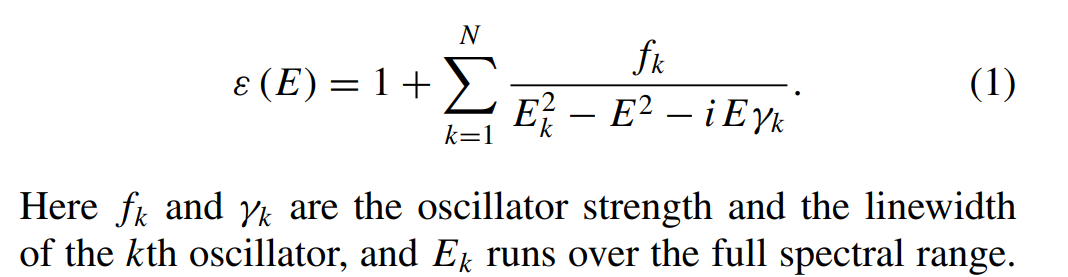

#Library and Others


In [1]:
#importing drive
import os
from google.colab import drive
if not os.path.ismount('/content/drive') :
  drive.mount('/content/drive')
  # %cd /gdrive

Mounted at /content/drive


In [2]:
import numpy as np
import math
import cmath


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
import matplotlib
from operator import truediv

from scipy import arange
from scipy.interpolate import interp1d
import scipy.constants as sc
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from scipy.special import wofz
import array as arr
from astropy.modeling.models import Voigt1D

from scipy.special import voigt_profile

from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as mpimg
from scipy.stats import norm

"""
%pip install lmfit
import lmfit.models
from lmfit.models import PseudoVoigtModel
%pip install odfpy
"""

'\n%pip install lmfit\nimport lmfit.models\nfrom lmfit.models import PseudoVoigtModel\n%pip install odfpy\n'

## Import Data

In [3]:
output_folder_address = "/content/drive/MyDrive/Optics_of_2D_Materials/Python_Coding/NRET_from_QD_2D/Outputs"

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Optics_of_2D_Materials/Python_Coding/Inputs/All_refractive_indices_2021_12_20.csv", delimiter=';')       # import the refractive index data

n_WS2 = np.array(data['n.2'])
n_WS2 = np.delete(n_WS2, (0, 1)).astype(float)                  #getting n values for WS2, deleting firts two because they are strings

k_WS2 = np.array(data['k.2'])
k_WS2 = np.delete(k_WS2,( 0, 1)).astype(float)                 #getting k values for Ws2, deleting firts two because they are strings

n_Graphene = np.array(data['n.14'])
n_Graphene = np.delete(n_Graphene, (0, 1)).astype(float)

k_Graphene = np.array(data['k.14'])
k_Graphene = np.delete(k_Graphene,( 0, 1)).astype(float)

n_MoS2 = np.array(data['n'])
n_MoS2 = np.delete(n_MoS2, (0, 1)).astype(float)                  #getting n values for WS2, deleting firts two because they are strings

k_MoS2 = np.array(data['k'])
k_MoS2 = np.delete(k_MoS2,( 0, 1)).astype(float)

drive_energy_array = np.array(data['Energy'])
drive_energy_array = np.delete(drive_energy_array,( 0, 1)).astype(float)       #getting energy values, deleting firts two because they are strings

#quantum_dot_data=pd.read_csv("/content/drive/MyDrive/Optics_of_2D_Materials/Python_Coding/Inputs/Quantum_dot_intensity.csv", delimiter=';', decimal=",")
#quantum_dot_array=np.array(quantum_dot_data)

WS2_1L_inplane_experiment = pd.read_csv("/content/drive/MyDrive/Optics_of_2D_Materials/Python_Coding/Reflection_Analysis/WS2_Reflection/1L_1/gamma0.001/WS2_1L_1_eps_gamma0.001.txt", names= ['Energy', 'Real', 'Imaginary'])

WS2_1L_inplane_experiment_energy = np.array(WS2_1L_inplane_experiment['Energy'])
WS2_1L_inplane_experiment_real = np.array(WS2_1L_inplane_experiment['Real'])
WS2_1L_inplane_experiment_imag = np.array(WS2_1L_inplane_experiment['Imaginary'])

WS2_2L_inplane_experiment = pd.read_csv("/content/drive/MyDrive/Optics_of_2D_Materials/Python_Coding/Reflection_Analysis/WS2_Reflection/2L_1/gamma0.001/WS2_2L_1_eps_gamma0.001.txt" , names= ['Energy', 'Real', 'Imaginary'])

WS2_2L_inplane_experiment_energy = np.array(WS2_2L_inplane_experiment['Energy'])
WS2_2L_inplane_experiment_real = np.array(WS2_2L_inplane_experiment['Real'])
WS2_2L_inplane_experiment_imag = np.array(WS2_2L_inplane_experiment['Imaginary'])


In [5]:
refractive_data = pd.read_excel("/content/drive/MyDrive/Optics_of_2D_Materials/Python_Coding/NRET_from_QD_2D/Inputs/refractive_index_info_n_k/hsu.xlsx")

refractive_data['eV'] = 1.2398 / refractive_data['wavelength']
refractive_data.sort_values( by = 'eV', inplace = True, ignore_index = True)

refractive_data = refractive_data[(refractive_data['eV']>= 1.65) & (refractive_data['eV']<= 2.55)].reset_index()

layer_list = [1, 2] ; item_list = ['WS2', 'MoS2']; index_list = ['n', 'k']

for layer in layer_list :
  for item in item_list :
    for index in index_list :
      refractive_data['%sL_%s_%s' %(layer, item, index)] = refractive_data['%sL_%s_%s' %(layer, item, index)]/10000


refractive_wl = np.array(refractive_data['wavelength']) ; refractive_eV = np.array(refractive_data['eV'])

WS2_1L_n = np.array(refractive_data['1L_WS2_n']) ; WS2_1L_k = np.array(refractive_data['1L_WS2_k'])
WS2_2L_n = np.array(refractive_data['2L_WS2_n']) ; WS2_2L_k = np.array(refractive_data['2L_WS2_k'])
MoS2_1L_n = np.array(refractive_data['1L_MoS2_n']) ; MoS2_1L_k = np.array(refractive_data['1L_MoS2_k'])
MoS2_2L_n = np.array(refractive_data['2L_MoS2_n']) ; MoS2_2L_k = np.array(refractive_data['2L_MoS2_k'])

In [6]:
WS2_2L_data = pd.read_csv("/content/drive/MyDrive/Optics_of_2D_Materials/Python_Coding/NRET_from_QD_2D/Inputs/WS2_2L/ws2_diel_funct.txt", sep="\t")

WS2_2L_data.sort_values('energy_eV', inplace = True, ignore_index = True)

WS2_2L_data_fit_range = WS2_2L_data[(WS2_2L_data['energy_eV']>= 1.8) & (WS2_2L_data['energy_eV']<= 3)].reset_index()

WS2_2L_in_plane_real = np.array(WS2_2L_data_fit_range["ws2bl_2h_e1"])
WS2_2L_in_plane_imag = np.array(WS2_2L_data_fit_range["ws2bl_2h_e2"])
WS2_2L_energy =  np.array(WS2_2L_data_fit_range["energy_eV"])

In [7]:
quantum_dot_data = pd.read_csv("/content/drive/MyDrive/Optics_of_2D_Materials/Python_Coding/Inputs/QD_7_PL_1s_subtracted.csv", sep = ",", header = None)
quantum_dot_array = np.array(quantum_dot_data) # data we have obtained 21.09.2022



In [8]:
quantum_dot_size_picture_8 = np.array(pd.read_excel("/content/drive/MyDrive/Optics_of_2D_Materials/Experiments/ZnCdSe CdSe_QD_TEM_images/Results/8_deleted.xlsx")['Area'])
quantum_dot_size_picture_9 = np.array(pd.read_excel("/content/drive/MyDrive/Optics_of_2D_Materials/Experiments/ZnCdSe CdSe_QD_TEM_images/Results/9_deleted.xlsx")['Area'])
quantum_dot_size_picture_15 = np.array(pd.read_excel("/content/drive/MyDrive/Optics_of_2D_Materials/Experiments/ZnCdSe CdSe_QD_TEM_images/Results/15_deleted.xlsx")['Area'])

quantum_dot_size_picture_9_2 = np.array(pd.read_csv("/content/drive/MyDrive/Optics_of_2D_Materials/Experiments/ZnCdSe CdSe_QD_TEM_images/Results/9_Results_2.csv")['Area'])
quantum_dot_size_picture_9_3 = np.array(pd.read_csv("/content/drive/MyDrive/Optics_of_2D_Materials/Experiments/ZnCdSe CdSe_QD_TEM_images/Results/9_Results_3.csv")['Area'])

In [9]:
graphene_inplane_n_from_graph = pd.read_csv('/content/drive/MyDrive/Optics_of_2D_Materials/Python_Coding/Inputs/Graphene_n_k/n_in.csv', sep = ';', decimal = ',', names = (['wavelength', 'unit']))
graphene_inplane_k_from_graph = pd.read_csv('/content/drive/MyDrive/Optics_of_2D_Materials/Python_Coding/Inputs/Graphene_n_k/k_in.csv', sep = ';', decimal = ',', names = (['wavelength', 'unit']))

graphene_inplane_n_from_graph['eV'] = 1239.8 / graphene_inplane_n_from_graph['wavelength']
graphene_inplane_k_from_graph['eV'] = 1239.8 / graphene_inplane_k_from_graph['wavelength']

graphene_inplane_k_from_graph.sort_values('eV', inplace = True); graphene_inplane_n_from_graph.sort_values('eV', inplace = True)

## Parameters

In [10]:
#matplotlib.rcParams

In [11]:
#Updating graph parameters
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

figsize = (6,5);

# Fonts
plt_label_size = 12; legend_font_size = plt_label_size*1 ;

# Line thicknesses
axes_linewidth = 3; lines_linewidth = axes_linewidth;

# Tick sizes
major_tick_size = 6; minor_tick_size = major_tick_size / 2; tick_width = major_tick_size / 4

kw_args = { 'figure.figsize' : figsize, # 'font.family' : 'cursive', # 'font.monospace' : 'Fixed',

            'axes.linewidth': axes_linewidth, 'lines.linewidth': lines_linewidth, 'axes.labelsize' : plt_label_size,

            'axes.grid' : True, 'grid.alpha' : 0.25, 'grid.color' :  'gray', 'grid.linestyle': '--',

            'legend.fontsize': legend_font_size,  'legend.title_fontsize' : legend_font_size,


            'xtick.direction':'in', 'xtick.major.size' : major_tick_size, 'xtick.major.width': tick_width, 'xtick.major.pad': major_tick_size,
            'xtick.minor.size' : minor_tick_size, 'xtick.minor.width': tick_width, 'xtick.labelsize': plt_label_size, 'xtick.minor.visible': True,
            'xtick.color' : 'k', 'xtick.top': True,

            'ytick.direction':'in', 'ytick.major.size' : major_tick_size, 'ytick.major.width': tick_width, 'ytick.major.pad': major_tick_size,
            'ytick.minor.size' : minor_tick_size, 'ytick.minor.width': tick_width, 'ytick.labelsize': plt_label_size,  'ytick.minor.visible': True,
            'ytick.color' : 'k', 'ytick.right': True,

           'savefig.bbox': "tight"

           }

plt.rcParams.update(kw_args)

#Defining the mostly defined texts
eps_real_inplane_text = "Re$[\epsilon_{\parallel}]$"; eps_imag_inplane_text = "Im$[\epsilon_{\parallel}]$"

WS2_text = "$\mathrm{WS_2}$"

QD_name = "ZnCdSe/ZnSe"

excitons_list = ['A', 'B', 'C', 'D']

WS2_2L_excitons_list = ['A', 'B', 'C']

QD_2D_NRET_dipole_norm_text = "$\Gamma_{\mathrm{QD-2D}}/\Gamma_0$"

QD_1L_WS2_NRET_dipole_norm_text = "$\Gamma_{\mathrm{QD-1L\ WS_2}}/\Gamma_0$"
QD_2L_WS2_NRET_dipole_norm_text = "$\Gamma_{\mathrm{QD-2L\ WS_2}}/\Gamma_0$"

QD_1L_Graphene_NRET_dipole_norm_text = "$\Gamma_{\mathrm{QD-1L\ Graphene}}/\Gamma_0$"

QD_2D_NRET_bulk_norm_text = "$\Gamma_{\mathrm{QD-2D}}/\Gamma_{\mathrm{QD-bulk\ WS_2}}$"

QD_1L_WS2_NRET_bulk_norm_text = "$\Gamma_{\mathrm{QD-1L\ WS_2}}/\Gamma_{\mathrm{QD-bulk\ WS_2}}$"


QD_2L_WS2_NRET_bulk_norm_text = "$\Gamma_{\mathrm{QD-2L\ WS_2}}/\Gamma_{\mathrm{QD-bulk\ WS_2}}$"

QD_bulk_2D_NRET_text = "$\Gamma_{\mathrm{QD-bulk\ WS_2}}$"


t_1L_WS2 = 6.2 * pow(10, -10)            #thickness of monolayer WS2

d_0D_2D = 3.32 * pow(10, -9)                  #distance between donor and surface

t_2D = t_1L_WS2 # default thickness is that of WS2

dipole_moment = pow(10, -28) # on the order of 1 nm * 1 eV;
hbar = 6.582 * pow(10, -16)             # hbar in units of eV.s
gamma_number = (8 * (dipole_moment**2)) / (9 * hbar * d_0D_2D**3)
light_speed = sc.c                          #speed of ligth

eps_out_WS2 = 7 #out of plane of dielectric constant of WS2

eps_inplane_MoS2 = complex(18.2, 11.3)     #in plane component of dielectric
eps_outplane_MoS2 = complex(7.1,0)      #out of plane of dielectric constant of MoS2

beta_MoS2 = (eps_inplane_MoS2*eps_outplane_MoS2)**0.5      #effective permittivity of acceptor
delta_MoS2 = (eps_inplane_MoS2/eps_outplane_MoS2)**0.5     #dielectric anisotropy of acceptor

t_1L_Graphene = 0.335 * pow(10, -10)
t_2D_Graphene = t_1L_Graphene

strain_range = np.arange(-1, 5, 1)

#shift values of the excitons under strain
WS2_excitons_vs_strain = [-0.04519, 0.0095, 0.02446]

WS2_2L_excitons_vs_strain = [-0.04519, 0.0095, 0.02446]

WS2_2L_exciton_peaks_from_experiment = np.array([1.98, 2.36, 2.74, 3])  #A, B, C, D
WS2_2L_exciton_widths_from_experiment = np.array([.067, .173, .240, .4]) #A, B, C, D
#quantum_dot_wavelength = np.array(quantum_dot_array[:, 0])
#quantum_dot_intensity = np.array(quantum_dot_array[:,1])
#quantum_dot_energy = 1239.8 / quantum_dot_wavelength

#QD_PL_gauss_fit_params = np.array([0, 1, 2.11, 0.05])

In [12]:
quantum_dot_energy = np.array(quantum_dot_array[:, 0])
quantum_dot_intensity = np.array(quantum_dot_array[:,1])

## Functions

In [13]:
# Export a pandas data frame
def export_pd(output_pd, file_name="out", output_folder_address=output_folder_address, data_type=".csv" , index=False , header=True, delimeter=',' ):
    output_address = output_folder_address+"/"+ file_name + data_type

    output_pd.to_csv(path_or_buf=output_address, index=index, header=header, sep = delimeter)

    return output_address # it is useful for finding the file such as to attach to an email

In [14]:
def epsilon_from_nk(n_list, k_list):
  """
  Calculate de epsilon value using n and k values that are obtained from experiment.
  n: real part of refractive index
  k: complex part of refractive index
  """
  in_plane_imag = []; in_plane_real = []

  for (n, k) in zip(n_list, k_list):
    eps_inplane = complex(n**2 - k**2, 2 * n * k)
    in_plane_imag.append(eps_inplane.imag); in_plane_real.append(eps_inplane.real)

  real = np.array(in_plane_real); imag = np.array(in_plane_imag)
  epsilon = real + 1j*imag
  return epsilon


In [15]:
def gauss(x, H, A, x0, sigma):
    """ Calculate the probabilty density function (gaussian).
    x0 = expected value
    sigma = standart deviation
    A = height of the curve's peak
    """
    gaussian = H + A * np.exp(-(x - x0) ** 2 / (2 * sigma**2))
    return gaussian

In [ ]:
def lorentzian( x, x0, a, gam ):

    return a * gam**2 / ( gam**2 + ( x - x0 )**2)


In [ ]:
def voigt(x, shift, sigma, gamma, norm):
  z = (x - shift + 1j*gamma) / (sigma * np.sqrt(2))
  V = wofz(z).real / (sigma * np.sqrt(2 * np.pi))

  return V*norm

In [ ]:
def full_width_of_voigt ( sigma, gamma ):
  f_gauss = 2 * sigma * np.sqrt(2 * np.log(2))
  f_lorentz = 2 * gamma

  return 0.5346 * f_lorentz + np.sqrt( 0.2166 * (f_lorentz**2) + f_gauss**2)

In [ ]:
def area_size_histo ( area_array , picture_number):
  fig, ax1 = plt.subplots(); ax2 = ax1.twinx()

  """img = mpimg.imread('/content/drive/MyDrive/Optics_of_2D_Materials/Experiments/ZnCdSe CdSe_QD_TEM_images/%s.jpg' %picture_number)
  imagebox = OffsetImage(img, zoom = 0.05)
  ab = AnnotationBbox(imagebox, (50, 0.036), frameon = False)"""

  num_bins = round(np.sqrt(len(area_array)))
  #num_bins = 50
  mu, sigma = norm.fit(area_array)

  n, bins, patches = ax1.hist(area_array, num_bins,
                           density = 1,
                           color ='green',
                           alpha = 0.7)

  first_delete = np.delete(bins, (0))
  last_delete = np.delete(bins, (len(bins)-1))
  bin = (first_delete + last_delete)/2
  mu, std = norm.fit(area_array)

  """mu, std = norm.fit(area_array)
  p = norm.pdf(bins, mu, std)

  ax2.plot(bins, p, 'k', linewidth=2)
  title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
  plt.title(title)"""

  guess = np.array([0.5, 0.1, mu, std])

  QD_PL_gauss_fit_params, pcov = curve_fit(gauss, bin, n, guess) # best values for gaussian fit

  g_of_energy = gauss(bin, *QD_PL_gauss_fit_params) # gaussian fit

  ax2.plot(bin, g_of_energy)

  plt.title("\n Radius from Gauss fit to Area 'R = %.2f' with picture %s" %(np.sqrt(QD_PL_gauss_fit_params[2]/np.pi), picture_number))
  #ab = AnnotationBbox(imagebox, (bin.mean() + 20, g_of_energy.mean() + 0.001), frameon = False)
  #ax2.add_artist(ab)


  plt.show()

  return   np.sqrt(QD_PL_gauss_fit_params[2]/np.pi), QD_PL_gauss_fit_params

In [16]:
def radius_size_histo ( area_array , picture_number, version = 3, num_bins = 45,output_folder_address = output_folder_address):
  """ to find the size of qds"""
  #imagebox = mpimg.imread('/content/drive/MyDrive/Optics_of_2D_Materials/Experiments/ZnCdSe CdSe_QD_TEM_images/Outlines/%s_Outline_%s.tif' %(picture_number, version))
  #ab = AnnotationBbox(imagebox, (50, 0.036), frameon = False)


  radius_array = np.sqrt(area_array/np.pi)
  #num_bins = 50


  n, bins, patches = plt.hist(radius_array, num_bins,
                           density = 1,
                           color ='green',
                           alpha = 0.7)

  first_delete = np.delete(bins, (0))
  last_delete = np.delete(bins, (len(bins)-1))
  bin = (first_delete + last_delete)/2
  mu, std = norm.fit(radius_array)

  """mu, std = norm.fit(area_array)
  p = norm.pdf(bins, mu, std)

  ax2.plot(bins, p, 'k', linewidth=2)
  title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
  plt.title(title)"""

  guess = np.array([0.05, 1, mu, std])

  QD_PL_gauss_fit_params, pcov = curve_fit(gauss, bin, n, guess) # best values for gaussian fit

  g_of_energy = np.around(gauss(bin, *QD_PL_gauss_fit_params), decimals = 2) # gaussian fit

  sigma = np.var(g_of_energy) # new variance of QD_gaussian_PL
  FWHM = 2 * np.sqrt(2 * np.log(2)) * sigma # full width half maximum
  FWHM =  max(g_of_energy)/2

  index = np.where(g_of_energy.round(1) == FWHM.round(1))


  peak_index = np.where(g_of_energy == max(g_of_energy))

  peak_index= peak_index[0][0]
  peak_at_nm = bin[peak_index] # peak at this value(eV)

  FWHM_nm = bin[index[0][1]] - bin[index[0][0]]

  plt.plot( [bin[index[0][0]], bin[index[0][1]] ] , [FWHM, FWHM], '-r')

  plt.text(2.2, FWHM, '\nFWHM = %.2f nm' %FWHM_nm, ha='left', va='center')

  plt.plot(bin, g_of_energy, label = 'Gaussian')
  plt.xlabel('Radius Size (nm)')
  plt.ylabel('Histogram Frequency');plt.legend()

  #plt.title("\n Radius from Gauss fit to Radius 'R = %.2f nm' \n" %(QD_PL_gauss_fit_params[2]), fontsize = 15)
  #ab = AnnotationBbox(imagebox, (bin.mean() + 20, g_of_energy.mean() + 0.001), frameon = False)
  #ax2.add_artist(ab)

  plt.text(QD_PL_gauss_fit_params[2], 1.50, 'Gauss Peak = %.2f nm ' %QD_PL_gauss_fit_params[2], ha='left', va='center')
  plt.savefig(output_folder_address + "/QD_size_figure_%s_%s.png" %(picture_number, version))
  plt.show()
  plt.close()
  return

In [ ]:
def Integral_1(a, b, c, d):

  function = lambda x: (x**2 * cmath.exp(-2 * x) * a * (1 - cmath.exp(d * x)) / (b - c * cmath.exp(d * x))).imag

  integral = integrate.quad(function, 0, math.inf)[0]

  return integral

In [ ]:
def Integral_2(a, b):

  function = lambda x: (x**2 * cmath.exp(-2*x)*a/b).imag

  integral = integrate.quad(function, 0, math.inf)[0]

  return integral

In [ ]:
def epsilon_beta_delta(eps_inplane, eps_out):

  sqrt_of_mul = (eps_inplane * eps_out)**0.5
  sqrt_of_div = (eps_inplane / eps_out)**0.5

  return sqrt_of_mul, sqrt_of_div

In [ ]:
def exciton_peak_strain(strain,
                        oscillator_function_array,
                        exciton_positions_change_under_strain = WS2_excitons_vs_strain):
  #calculates the shift in the exciton peaks
  A = 0 + oscillator_function_array[0] + strain * exciton_positions_change_under_strain[0]
  B = A + oscillator_function_array[3] - oscillator_function_array[0] + strain * exciton_positions_change_under_strain[1]
  C = A + oscillator_function_array[6] - oscillator_function_array[0] + strain * exciton_positions_change_under_strain[2]
  D = oscillator_function_array[9]

  return A, B, C, D

In [ ]:
def In_plane_strain(oscillator_function_array,
                    strain = 0,
                    energy_array = np.array([1, 2]), exciton_positions_change_under_strain = WS2_excitons_vs_strain) :

  oscillator_function_array_copy = np.copy(oscillator_function_array)

  (oscillator_function_array_copy[0],
   oscillator_function_array_copy[3],
   oscillator_function_array_copy[6],
   oscillator_function_array_copy[9]) = exciton_peak_strain(strain, oscillator_function_array, exciton_positions_change_under_strain)

  return  calculate_epsilon_real_4(energy_array, *oscillator_function_array_copy), calculate_epsilon_imag_4(energy_array, *oscillator_function_array_copy)


In [ ]:
#calculates the dielectric function as a sum of 4 Lorenztians
def calculate_epsilon_imag_4(Energy,
                           E_center_1 = 2, f_1 = 0.1, gamma_1 = 0.1,
                           E_center_2 = 2, f_2 = 0.1, gamma_2 = 0.1,
                           E_center_3 = 2, f_3 = 0.1, gamma_3 = 0.1,
                           E_center_4 = 2, f_4 = 0.1, gamma_4 = 0.1,
                           b0 = 4):

  # adds 4 lorentzians
  L_4  = f_1/(E_center_1**2 - Energy**2 - 1j*Energy*gamma_1)
  L_4 += f_2/(E_center_2**2 - Energy**2 - 1j*Energy*gamma_2)
  L_4 += f_3/(E_center_3**2 - Energy**2 - 1j*Energy*gamma_3)
  L_4 += f_4/(E_center_4**2 - Energy**2 - 1j*Energy*gamma_4)

  return L_4.imag

  def calculate_epsilon_real_4(Energy,
                           E_center_1 = 2, f_1 = 0.1, gamma_1 = 0.1,
                           E_center_2 = 2, f_2 = 0.1, gamma_2 = 0.1,
                           E_center_3 = 2, f_3 = 0.1, gamma_3 = 0.1,
                           E_center_4 = 2, f_4 = 0.1, gamma_4 = 0.1,
                           background = 0):

  # add 4 lorentzians
  L_4  = f_1/(E_center_1**2 - Energy**2 - 1j*Energy*gamma_1) + background
  L_4 += f_2/(E_center_2**2 - Energy**2 - 1j*Energy*gamma_2)
  L_4 += f_3/(E_center_3**2 - Energy**2 - 1j*Energy*gamma_3)
  L_4 += f_4/(E_center_4**2 - Energy**2 - 1j*Energy*gamma_4)

  return L_4.real

In [ ]:
 #calculates the dielectric function as sum of desired number of Lorenztians
def calculate_epsilon_imag_N(Energy, *args):

  exciton_peak_number  = int(len(args) / 3)

  list_of_args = np.array_split(args, exciton_peak_number)

  lorentz = 0

  for list_of_arg in list_of_args:
    #print("Exciton #: %s" %list_of_arg)
    lorentz += list_of_arg[1] / ( list_of_arg[0]**2 - Energy**2 - 1j*Energy*list_of_arg[2])


  return lorentz.imag

def calculate_epsilon_real_N(Energy, background , *args ):


  exciton_peak_number = int(len(args) / 3)

  list_of_args = np.array_split(args, exciton_peak_number)

  lorentz = 0

  for list_of_arg in list_of_args:
    #print("Exciton #: %s" %list_of_arg)
    lorentz += list_of_arg[1] / ( list_of_arg[0]**2 - Energy**2 - 1j*Energy*list_of_arg[2])


  return lorentz.real + background



In [ ]:
def QD_2D_NRET_bulk_norm(oscillator_function_array,
                         strain = 0,
                         energy_array = np.array([1, 2]),
                         eps_out = eps_out_WS2,
                         peak = 1,
                         t_2D = t_2D,
                         d_0D_2D = d_0D_2D, exciton_positions_change_under_strain = WS2_excitons_vs_strain):

  """" Calculates the NRET (normalized by the NRET rate between QD and bulk of 2D material)
       between a 1L WS2 and QD with as a function of energy """

  if peak == 1:

    beta, delta = epsilon_beta_delta(In_plane_strain(oscillator_function_array, strain, energy_array, exciton_positions_change_under_strain)[0] +
                                     1j*In_plane_strain(oscillator_function_array, strain, energy_array, exciton_positions_change_under_strain)[1], eps_out )

  elif peak == 0:

    beta, delta = epsilon_beta_delta(oscillator_function_array, eps_out )

  b_1 = beta**2 + 1; b_2 = (beta+ 1)**2; b_3 = (beta - 1)**2; b_4 = -2*delta*t_2D/d_0D_2D

  res=[]

  for i in range(len(energy_array)):
    y = Integral_1(b_1[i], b_2[i], b_3[i], b_4[i])
    z = Integral_2(b_1[i], b_2[i])
    res.append(y/z)

  return res

In [ ]:
def QD_2D_NRET_bulk_norm_total(oscillator_function_array,
                               strain = 0,
                               energy_array = np.array([1, 2]), eps_out = eps_out_WS2,  peak = 1,
                               t_2D = t_2D,
                               d_0D_2D = d_0D_2D, exciton_positions_change_under_strain = WS2_excitons_vs_strain):

  """ Calculates the total NRET (normalized by the NRET rate between QD and bulk of 2D material)
      between a 1L WS2 and QD with a gaussian photoluminescence lineshape"""

  function = lambda energy_x: QD_2D_NRET_bulk_norm(oscillator_function_array,
                                                   strain,
                                                   np.array([energy_x]), eps_out, peak,
                                                   t_2D = t_2D,
                                                   d_0D_2D = d_0D_2D,  exciton_positions_change_under_strain = WS2_excitons_vs_strain )[0] * gauss(energy_x, *QD_PL_gauss_fit_params, )

  res = integrate.quad(function, min(energy_range), max(energy_range) )[0]

  # normalization for the QD photoluminescence
  gauss_area = integrate.quad(lambda energy: gauss(energy, *QD_PL_gauss_fit_params),
                              min(energy_range),
                              max(energy_range))[0]
  rate = res/gauss_area

  return rate

In [ ]:
def calculate_QD_2D_NRET_dipole_norm(oscillator_function_array,
                           strain = 0,
                           energy_array = np.array([1, 2]),
                           eps_out= eps_out_WS2,
                           peak=1,
                           t_2D = t_2D,
                           d_0D_2D = d_0D_2D, exciton_positions_change_under_strain = WS2_excitons_vs_strain):
  """ Calculates the NRET (normalized by dipole emission to vacuum)
      between a 1L WS2 and QD with as a function of energy"""

  if peak == 1:
    beta, delta = epsilon_beta_delta(In_plane_strain(oscillator_function_array, strain, energy_array, exciton_positions_change_under_strain)[0] +
                                     1j*In_plane_strain(oscillator_function_array, strain, energy_array, exciton_positions_change_under_strain)[1], eps_out)

  elif peak == 0:

    beta, delta = epsilon_beta_delta(oscillator_function_array, eps_out )

  b_1 = beta**2 + 1;  b_2= (beta + 1)**2; b_3= (beta - 1)**2; b_4= -2*delta*t_2D/d_0D_2D

  intt = []

  for i in range(len(energy_array)):

    y = Integral_1(b_1[i], b_2[i], b_3[i], b_4[i])

    intt.append(y)

  num = (2*(hbar*light_speed)**3)/(3*(energy_array*d_0D_2D)**3)

  rnet = intt*num

  return rnet

In [ ]:
def calculate_QD_2D_NRET_dipole_norm_total(strain, energy_range , QD_PL_gauss_fit_params , oscillator_function_array , eps_out = eps_out_WS2, peak = 1,  t_2D = t_2D, d_0D_2D = d_0D_2D, exciton_positions_change_under_strain = WS2_excitons_vs_strain):
  """ Calculates the total NRET (normalized by dipole emission to vacuum)
      between a 1L WS2 and QD with a gaussian photoluminescence lineshape"""

  function = lambda energy_x: calculate_QD_2D_NRET_dipole_norm(oscillator_function_array,
                                                     strain,
                                                     np.array([energy_x]),
                                                     eps_out,
                                                     peak = peak,
                                                     t_2D = t_2D,
                                                     d_0D_2D = d_0D_2D, exciton_positions_change_under_strain = exciton_positions_change_under_strain)[0] * gauss(energy_x, *QD_PL_gauss_fit_params)

  res = integrate.quad(function, min(energy_range), max(energy_range))[0]

  # normalization for the QD photoluminescence
  gauss_area = integrate.quad(lambda energy: gauss(energy, *QD_PL_gauss_fit_params),
                              min(energy_range),
                              max(energy_range))[0]

  rate = res/gauss_area

  return rate

In [ ]:
def colors_BR(N=5):
  """ Creates a color list from Blue to Red"""

  for i in range (N): # create a linear color list from red to blue

    blue_red_color_list.append([1 - i/(N-1), 0, i/(N-1), 1])

  return blue_red_color_list


In [ ]:
def Plank_formula(wavelength):

  energy = h * light_speed / wavelength

  return energy

# Graphene

In [ ]:
wavelength_nm = np.array([405, 436, 461, 516, 546, 577, 620, 700, 750])
ne = np.array([1.53, 1.52, 1.51, 1.50, 1.50, 1.50, 1.50, 1.50, 1.49]) # ne and ke values corresponding to wavelengths(nm) are
ke = np.array([0.66, 0.66, 0.66, 0.65, 0.65, 0.65, 0.64, 0.63, 0.63]) # obtained from  PHYSICAL REVIEW B 76, 085125, Table 1 , 2007

In [ ]:
h = 4.135667516 * pow(10, -15)

In [ ]:
energy_from_table = Plank_formula(wavelength_nm) # convert wavelengths to energy
energy_from_table = energy_from_table * pow(10, 9) # to obtain mev values

In [ ]:
energy_from_table = np.flip(energy_from_table) #to interpolate, the series must be increasing.
ne = np.flip(ne)
ke = np.flip(ke)

In [ ]:
cs_ne = CubicSpline(energy_from_table, ne) # interpolation of ne and ke values
cs_ke = CubicSpline(energy_from_table, ke)

In [ ]:
energy_range = np.linspace(1.6, 3.1, 9)

In [ ]:
ne_interp = cs_ne(drive_energy_array) # interpolated ne and ke values according to energy_array
ke_interp = cs_ke(drive_energy_array)

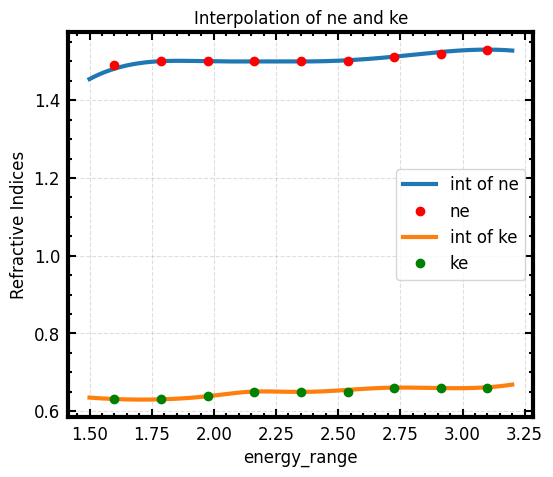

In [ ]:
plt.plot(drive_energy_array, ne_interp, label ='int of ne')
plt.plot(energy_range, ne, 'ro', label='ne')
plt.plot(drive_energy_array, ke_interp, label ='int of ke')
plt.plot(energy_range, ke, 'go', label='ke')
plt.title("Interpolation of ne and ke")
plt.xlabel('energy_range')
plt.ylabel('Refractive Indices')
plt.legend()
plt.show()

In [ ]:
eps_outplane_Graphene = epsilon_from_nk(ne_interp, ke_interp) # variying epsilon values wrt. interpolated ne and ke values
                                                              # instead of contant epsilon

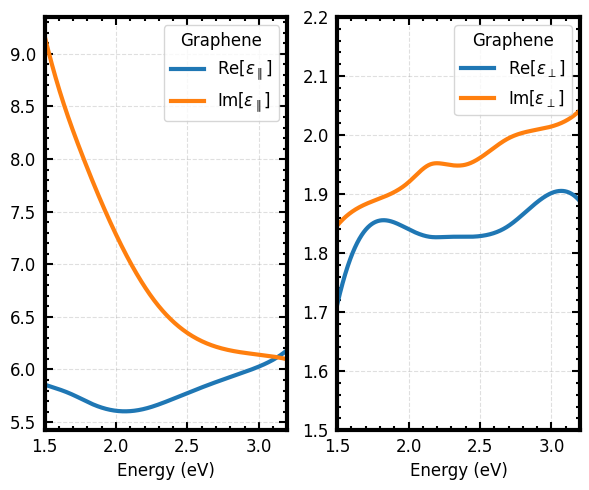

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(drive_energy_array, epsilon_from_nk(n_Graphene, k_Graphene).real, label = 'Re[$\epsilon_{\parallel}$]')
plt.plot(drive_energy_array, epsilon_from_nk(n_Graphene, k_Graphene).imag, label = 'Im[$\epsilon_{\parallel}$]')
plt.xlim([1.5, 3.2]); plt.xlabel('Energy (eV)')
plt.legend(title = 'Graphene')

plt.subplot(1, 2, 2)
plt.plot(drive_energy_array, eps_outplane_Graphene.real, label = 'Re[$\epsilon_{\perp}$]')
plt.plot(drive_energy_array, eps_outplane_Graphene.imag, label = 'Im[$\epsilon_{\perp}$]')
plt.xlim([1.5, 3.2]); plt.xlabel('Energy (eV)')
plt.ylim([1.5, 2.2]);
plt.legend(title = 'Graphene')
plt.tight_layout()

plt.savefig(output_folder_address + "/dielectric_graphene.png")
plt.show()
plt.close()

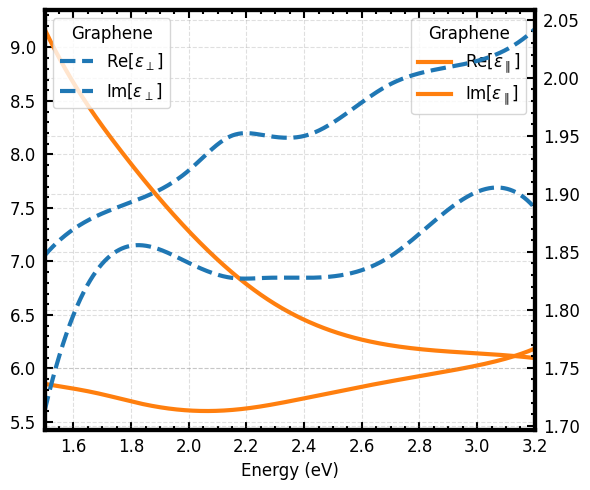

In [ ]:
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()
ax1.plot(drive_energy_array, epsilon_from_nk(n_Graphene, k_Graphene).real, color = 'tab:orange', label = 'Re[$\epsilon_{\parallel}$]')
ax1.plot(drive_energy_array, epsilon_from_nk(n_Graphene, k_Graphene).imag, color = 'tab:orange', label = 'Im[$\epsilon_{\parallel}$]')
ax1.set_xlim([1.5, 3.2]); ax1.set_xlabel('Energy (eV)')
ax1.legend(title = 'Graphene')

ax2.plot(drive_energy_array, eps_outplane_Graphene.real, '--', color = 'tab:blue', label = 'Re[$\epsilon_{\perp}$]')
ax2.plot(drive_energy_array, eps_outplane_Graphene.imag, '--', color = 'tab:blue', label = 'Im[$\epsilon_{\perp}$]')
ax2.set_xlim([1.5, 3.2]); ax2.set_xlabel('Energy (eV)')
ax2.legend(title = 'Graphene')
fig.tight_layout()

plt.savefig(output_folder_address + "/dielectric_graphene.png")
plt.show()
plt.close()

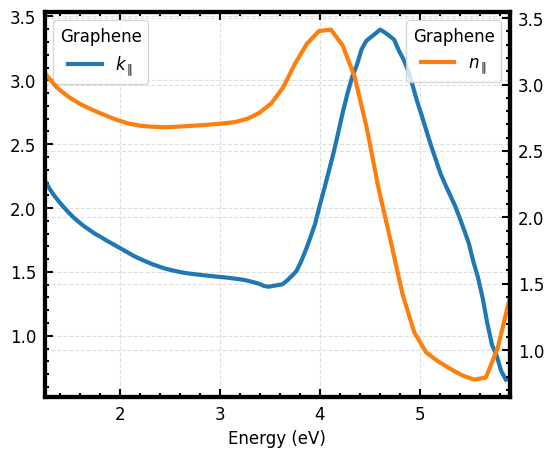

In [ ]:
plt.close()
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()
tick_spacing = 1
energy_k_linspace = np.linspace(graphene_inplane_k_from_graph['eV'].min(), graphene_inplane_k_from_graph['eV'].max(), 100)

spline_graphene_graph_k = interp1d(graphene_inplane_k_from_graph['eV'], graphene_inplane_k_from_graph['unit'])
ax1.plot(energy_k_linspace, spline_graphene_graph_k(energy_k_linspace), label = '$k_{\parallel}$')
#ax1.plot(graphene_inplane_k_from_graph['eV'], graphene_inplane_k_from_graph['unit'], '--', label = 'Graph k')
ax1.set_xlim([energy_k_linspace.min(), energy_k_linspace.max()]); ax1.set_xlabel('eV')
ax1.legend(title = 'Graphene')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))


energy_n_linspace = np.linspace(graphene_inplane_n_from_graph['eV'].min(), graphene_inplane_n_from_graph['eV'].max(), 40)

spline_graphene_graph_n = interp1d(graphene_inplane_n_from_graph['eV'], graphene_inplane_n_from_graph['unit'])
ax2.plot(energy_n_linspace, spline_graphene_graph_n(energy_n_linspace), label = '$n_{\parallel}$', color = 'tab:orange')
#ax2.plot(graphene_inplane_n_from_graph['eV'], graphene_inplane_n_from_graph['unit'], '--',  label = 'Graph n')
ax2.set_xlim([energy_n_linspace.min(), energy_n_linspace.max()]); ax1.set_xlabel('Energy (eV)')
ax2.legend(title = 'Graphene')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.spines['left'].set_color('tab:orange')
plt.savefig(output_folder_address + "/graphene_n_k.png")
plt.show()
plt.close()

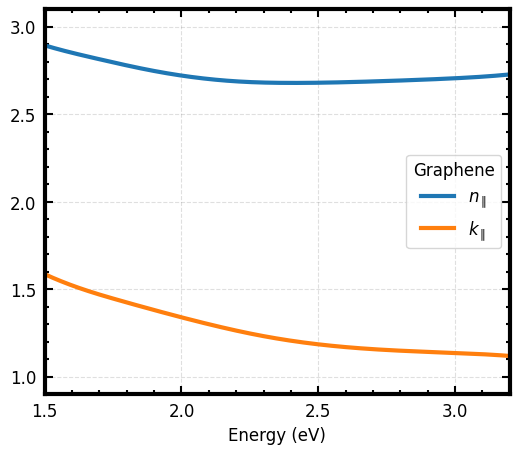

In [ ]:
plt.plot(drive_energy_array, n_Graphene, label  = '$n_{\parallel}$')
plt.plot(drive_energy_array, k_Graphene, label  = '$k_{\parallel}$')
plt.ylim(0.9, 3.1)
plt.locator_params(nbins=5)

plt.legend(title = 'Graphene')
plt.xlim([drive_energy_array.min(), drive_energy_array.max()]);plt.xlabel('Energy (eV)')
plt.savefig(output_folder_address + "/Graphene_n_k.png")
plt.show()
plt.close()

In [ ]:
#Graphene
# gives 1.83 + 1.95j) Reference: Table 1(n_e, k_e values) of Phys. Rev. B - Condens. Matter Mater. Phys. 76, 1 (2007).
#eps_outplane_Graphene = complex(1.8, 2.1)

# eps_outplane_Graphene = epsilon_from_nk([1.5], [0.65])[0]  OLD EPSILON VALUE

In [ ]:
eps_outplane_Graphene.shape

(851,)

#Quantum Dot

## Size of Quantum Dot

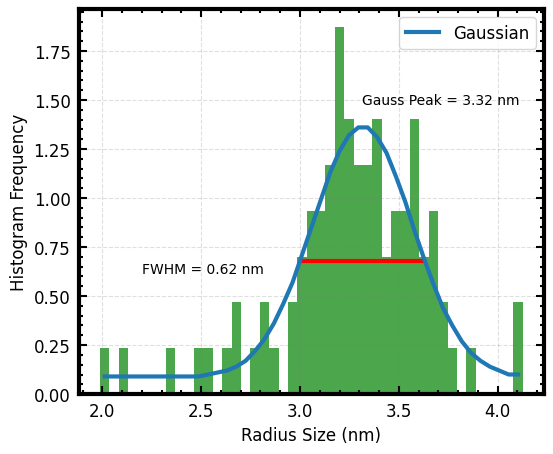

In [19]:
radius_size_histo( quantum_dot_size_picture_9_3, 9)

##PL of Quantum Dot

In [ ]:
#gaussian_energy = gauss(energy_array,*QD_PL_gauss_fit_params)

In [ ]:
quantum_dot_intensity = quantum_dot_intensity / max(quantum_dot_intensity) # normalization

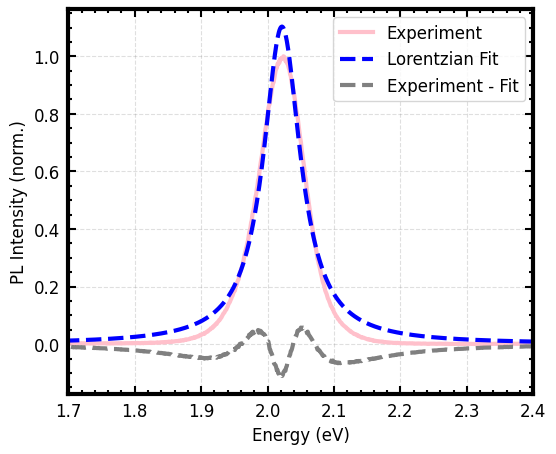

In [ ]:
guess_lorentz = np.array( [2.03,  0.5, -0.03])

lorentz_array, pcov_lorentzian = curve_fit(lorentzian, quantum_dot_energy, quantum_dot_intensity, guess_lorentz) # best values for gaussian fit
lorentz_array[1] = lorentz_array[1] + 0.0425
lorentz_of_energy = lorentzian(quantum_dot_energy, *lorentz_array) # lorentz fit

plt.plot(quantum_dot_energy, quantum_dot_intensity, "pink", label="Experiment")
plt.plot(quantum_dot_energy, lorentz_of_energy, '--b', label='Lorentzian Fit')
plt.plot(quantum_dot_energy, quantum_dot_intensity - lorentz_of_energy, '--', color = 'grey' , label='Experiment - Fit')

plt.xlim(1.7, 2.4); plt.xlabel("Energy (eV)"); plt.ylabel("PL Intensity (norm.)")
plt.legend()
plt.show()


In [ ]:
v_guess = np.array([2, 0.16, 0.0086, 0.5])

v_array, pcov = curve_fit(voigt, quantum_dot_energy, quantum_dot_intensity, v_guess) # best values for gaussian fit

v_of_energy = voigt(quantum_dot_energy, *v_array) # gaussian fit

v_array

array([2.02131623, 0.02890468, 0.01241402, 0.09757311])

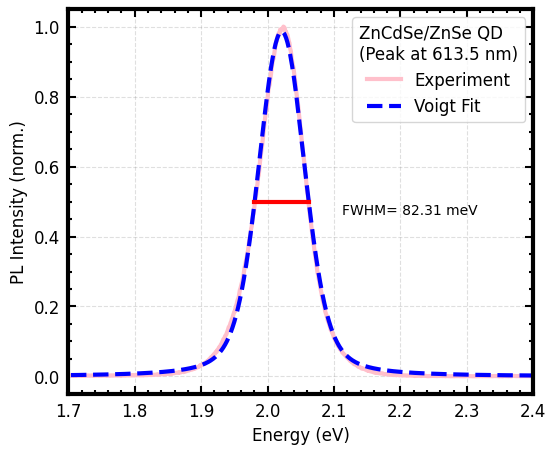

In [ ]:
plt.close()
plt.plot(quantum_dot_energy, quantum_dot_intensity, "pink", label="Experiment")
plt.plot(quantum_dot_energy, v_of_energy,'--b', label='Voigt Fit')


peak_index_v = np.where(v_of_energy == max(v_of_energy))
peak_index_v  = peak_index_v[0][0]

peak_v_at_ev = quantum_dot_energy[peak_index_v] # peak at this value(eV)
peak_v_nm = np.round((1239.8 / peak_v_at_ev),1) # peak at this value(nm)
peak_v_at_ev = quantum_dot_energy[peak_index_v] # peak at this value(eV)
peak_v_nm = np.round((1239.8 / peak_v_at_ev),1) # peak at this value(nm)

FWHM_v_ev = full_width_of_voigt ( v_array[1], v_array[2])
FWHM_v_mev =  np.round(FWHM_v_ev * 1000, 2)

plt.text((peak_v_at_ev + FWHM_v_ev / 2)+0.05, max(quantum_dot_intensity) / 2, '\nFWHM= ' + str(FWHM_v_mev) + ' meV', ha='left', va='center')
plt.plot([ peak_v_at_ev - FWHM_v_ev / 2, peak_v_at_ev + FWHM_v_ev / 2],[ max(quantum_dot_intensity) / 2]*2, '-r')
plt.xlim(1.7, 2.4); plt.xlabel("Energy (eV)"); plt.ylabel("PL Intensity (norm.)")
plt.legend(title = (QD_name + ' QD \n(Peak at ' + str(peak_v_nm) + ' nm)'))
plt.plot()
plt.savefig(output_folder_address + "/QD_PL_voigt_fit.png")
plt.show()
plt.close()

In [ ]:
QD_PL_gauss_fit_params, pcov = curve_fit(gauss, quantum_dot_energy, quantum_dot_intensity) # best values for gaussian fit
QD_PL_gauss_fit_params[1] = QD_PL_gauss_fit_params[1] + 0.0425
QD_gaussian_PL = gauss(drive_energy_array, *QD_PL_gauss_fit_params) # gaussian fit


In [ ]:
peak_index = np.where(QD_gaussian_PL == max(QD_gaussian_PL))
peak_index= peak_index[0][0]
peak_at_ev = drive_energy_array[peak_index] # peak at this value(eV)
peak_nm = np.round((1239.8 / peak_at_ev),1) # peak at this value(nm)

In [ ]:
sigma = np.var(QD_gaussian_PL) # new variance of QD_gaussian_PL
FWHM = 2 * np.sqrt(2 * np.log(2)) * sigma # full width half maximum
FWHM_ev =  np.abs(np.round(FWHM,5))
FWHM_mev =  FWHM_ev * 1000


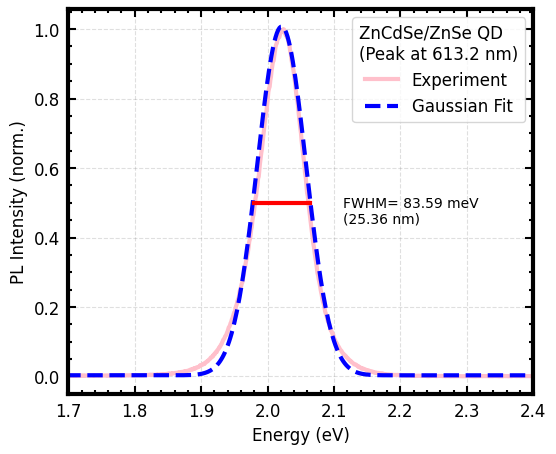

In [ ]:
plt.close()
plt.plot(quantum_dot_energy, quantum_dot_intensity, "pink", label="Experiment")
plt.plot(drive_energy_array, QD_gaussian_PL, '--b', label='Gaussian Fit')

plt.plot([ peak_at_ev - FWHM_ev / 2, peak_at_ev + FWHM_ev / 2],[ max(quantum_dot_intensity) / 2]*2, '-r')

plt.xlim(1.7, 2.4); plt.xlabel("Energy (eV)"); plt.ylabel("PL Intensity (norm.)")

FWHM_nm = ((1239.8 / (peak_at_ev - FWHM_ev / 2)) - ( 1239.8 / (peak_at_ev + FWHM_ev / 2))).round(2)

plt.text((peak_at_ev + FWHM_ev / 2)+0.05, max(quantum_dot_intensity) / 2, '\nFWHM= ' + str(FWHM_mev) + ' meV\n(' + str(FWHM_nm) + ' nm)', ha='left', va='center')

plt.legend(title = (QD_name + ' QD \n(Peak at ' + str(peak_nm) + ' nm)'))
plt.plot()
plt.savefig(output_folder_address + "/QD_PL_gauss_fit.png")
plt.show()
plt.close()

In [ ]:
( (peak_at_ev + FWHM_ev / 2)), (1239.8 / (peak_at_ev - FWHM_ev / 2))

(2.063795, 626.0967930088046)

#Lorentzian fit of 1L WS$_2$ dielectric function - Literature


[Measurement of the optical dielectric function of monolayer transition-metal dichalcogenides: MoS2 , MoSe2 , WS2 , and WSe2](https://link.aps.org/doi/10.1103/PhysRevB.90.205422)


## Plot ε of WS$_2$

In [ ]:
eps_of_WS2_from_nk = epsilon_from_nk(n_WS2, k_WS2)

In [ ]:
print(n_WS2[0])
print(n_WS2[-1])

3.91904116771555
3.2345868600676


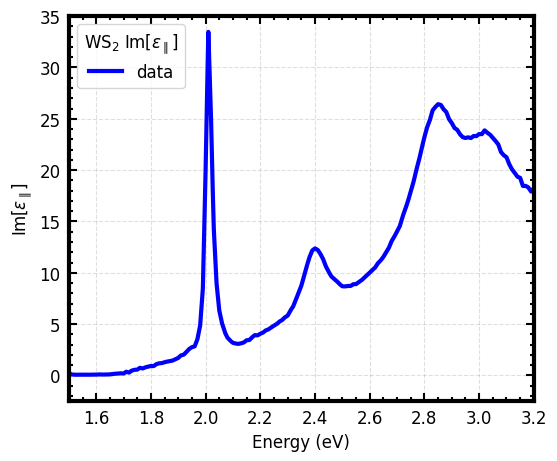

In [ ]:
plt.plot(drive_energy_array, eps_of_WS2_from_nk.imag, "b", label="data")
plt.legend(title = WS2_text + " " + eps_imag_inplane_text, loc = "upper left"); plt.xlim(1.5, 3.2); plt.ylim(-2.5,35)
plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text)

plt.savefig(output_folder_address + "/Imaginary_part_of_WS2_inplane.png")
plt.show()
plt.close()


## Fitting the Imaginary Part

In [ ]:
eps_imag_initial_guess = [2.012, 1.78, 0.028, 2.40, 3.3,  0.16, 2.83, 10, 0.23, 3.05, 25, .45, 8.83]

eps_imag_of_WS2_from_energy = calculate_epsilon_imag_4(drive_energy_array, *eps_imag_initial_guess ) #neyin epsilonu

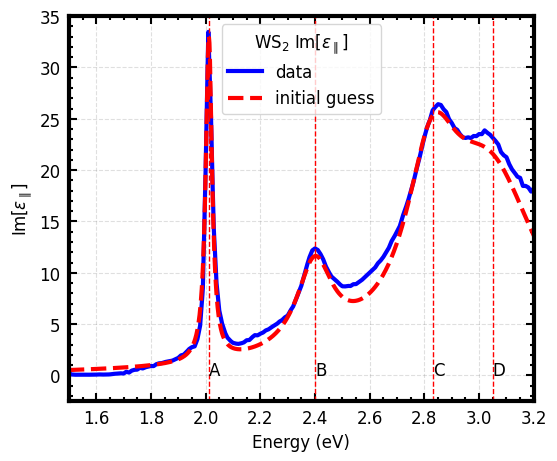

In [ ]:
plt.plot(drive_energy_array, eps_of_WS2_from_nk.imag, "b", label="data")

for (x_center, exciton_text) in zip(eps_imag_initial_guess[0::3], excitons_list):
  plt.text(x_center, 0, exciton_text, fontsize = plt_label_size)
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)

plt.plot(drive_energy_array, eps_imag_of_WS2_from_energy, "--", color= "red", label="initial guess")
plt.legend(title = WS2_text + " " + eps_imag_inplane_text); plt.xlim(1.5, 3.2); plt.ylim(-2.5,35)
plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text)
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


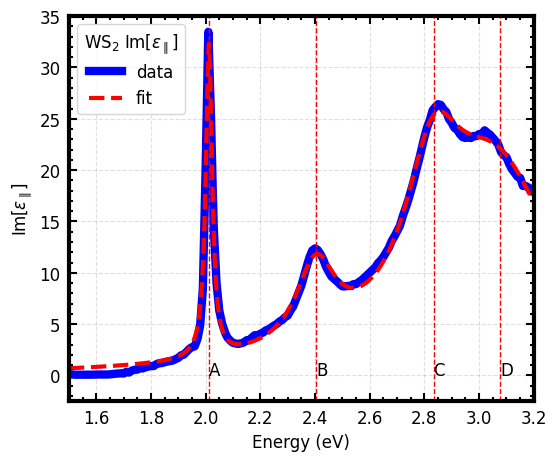

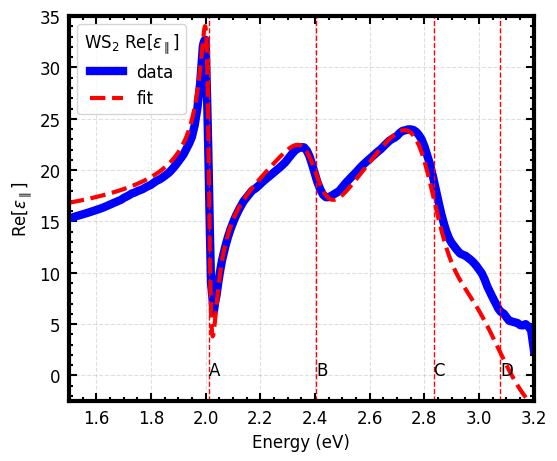

array([2.01224425e+00, 1.73180962e+00, 2.82172728e-02, 2.40432198e+00,
       3.39145926e+00, 1.77130753e-01, 2.83322673e+00, 9.74524258e+00,
       2.47734442e-01, 3.07590972e+00, 3.20447898e+01, 5.43142132e-01,
       8.83000000e+00])

In [ ]:
popt_imag, pcov = curve_fit(calculate_epsilon_imag_4, drive_energy_array, eps_of_WS2_from_nk.imag, eps_imag_initial_guess)

eps_imag_from_popt = calculate_epsilon_imag_4(drive_energy_array, *popt_imag)
eps_real_from_popt = calculate_epsilon_real_4(drive_energy_array, *popt_imag)

fit_error_imag = [x-y for x, y in zip(eps_of_WS2_from_nk.imag, eps_imag_from_popt)]
fit_error_real = [x-y for x, y in zip(eps_of_WS2_from_nk.real, eps_real_from_popt)]

plt.plot(drive_energy_array, eps_of_WS2_from_nk.imag, "b", label = "data", linewidth="6")
plt.plot(drive_energy_array, eps_imag_from_popt, "r--", label="fit", linewidth="3")
#plt.plot(energy_array, fit_error_imag,"b", label="(data-fit)")

for (x_center, exciton_text) in zip(popt_imag[0::3], excitons_list):
  plt.text(x_center, 0, exciton_text, fontsize = plt_label_size)
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)

plt.legend(title = WS2_text + " " + eps_imag_inplane_text); plt.xlim(1.5, 3.2); plt.ylim(-2.5,35)
plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text)
plt.show()


plt.plot(drive_energy_array, eps_of_WS2_from_nk.real, "b", label = "data", linewidth="6")
plt.plot(drive_energy_array, eps_real_from_popt, "r--", label="fit", linewidth="3")
#plt.plot(energy_array, fit_error_real, "b", label="(data-fit)")

for (x_center, exciton_text) in zip(popt_imag[0::3], excitons_list):
  plt.text(x_center, 0, exciton_text, fontsize = plt_label_size)
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)

plt.legend(title = WS2_text + " " + eps_real_inplane_text); plt.xlim(1.5, 3.2); plt.ylim(-2.5,35)
plt.xlabel("Energy (eV)"); plt.ylabel(eps_real_inplane_text)
plt.show()

popt_imag

## Fitting the Real Part

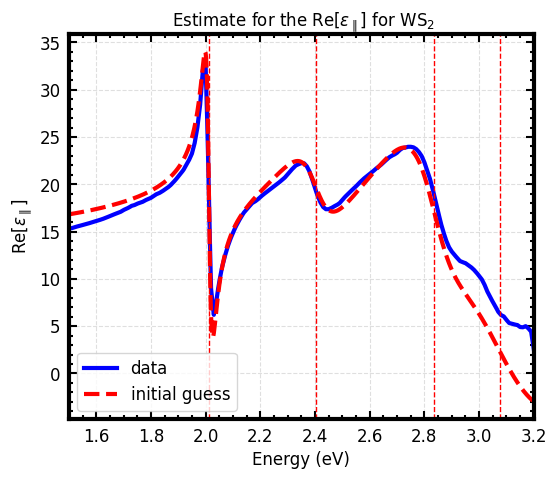

In [ ]:
plt.plot(drive_energy_array, eps_of_WS2_from_nk.real,"b", label="data")

eps_real_initial_guess = [2.012, 1.4, 0.03, 2.40, 1.7,  0.13, 2.85, 9, 0.25, 3.05, 30, .8, 11]

eps_real_initial_guess = popt_imag

plt.plot(drive_energy_array, calculate_epsilon_real_4(drive_energy_array, *eps_real_initial_guess ), "--", color= "red", label="initial guess")
for x_center in eps_real_initial_guess[0::3]:
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)

plt.legend()
plt.xlim(1.5, 3.2)
plt.xlabel("Energy (eV)"); plt.ylabel(eps_real_inplane_text)
plt.title(" Estimate for the Re$[\epsilon_{\parallel}]$ for " + WS2_text)
plt.show()

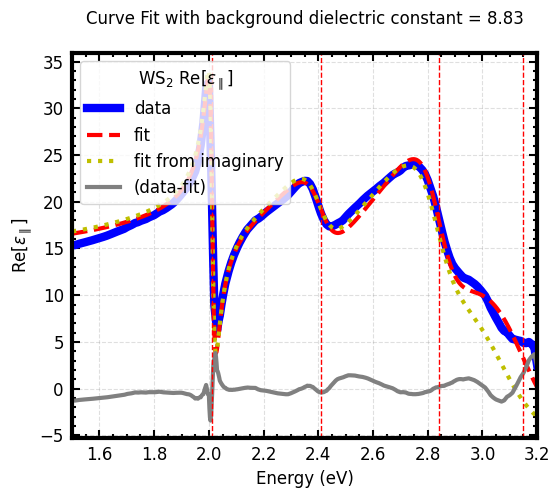

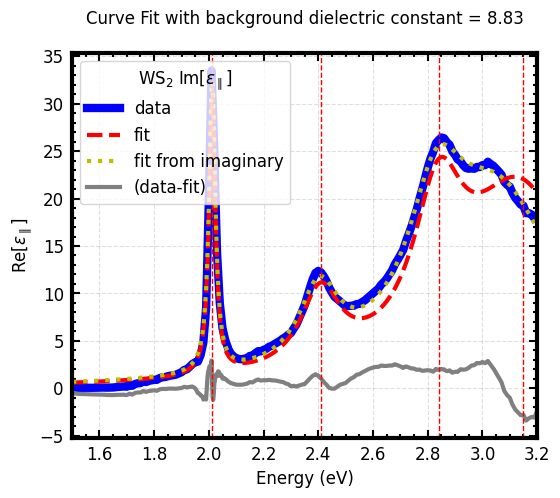

In [ ]:
upper_bound =             [  2.1,    2.0,     0.0275,    2.45,   4.1,  0.177,       3,      10,     0.22,   3.15,    40,    0.54,    10 ]

eps_real_initial_guess =  [  2.01,   1.73,    0.027,     2.40,   3.41,  0.175,    2.83,     9.7,    0.21,   3.07,    34,     0.5,   5.02]

lower_bound =             [  2.0,    1.65,    0.025,     2.35,   3.4,   0.15,      2.5,     9.5,    0.20,   3.04,    33,     0.4,    5  ]



popt_real, pcovv = curve_fit(calculate_epsilon_real_4, drive_energy_array, epsilon_from_nk(n_WS2, k_WS2).real, eps_real_initial_guess, bounds=(lower_bound, upper_bound))

fit_error_real_1 = [x-y for x, y in zip(epsilon_from_nk(n_WS2, k_WS2).real, calculate_epsilon_real_4(drive_energy_array, *popt_real))]

plt.plot(drive_energy_array, epsilon_from_nk(n_WS2, k_WS2).real, "b", label = "data", linewidth="6")
plt.plot(drive_energy_array, calculate_epsilon_real_4(drive_energy_array, *popt_real), "r--", label="fit", linewidth="3")
plt.plot(drive_energy_array, calculate_epsilon_real_4(drive_energy_array, *popt_imag) , 'y', linestyle="dotted", label="fit from imaginary")
plt.plot(drive_energy_array, fit_error_real_1, "gray", label="(data-fit)")
for x_center in popt_real[0::3]:
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)


plt.xlim(1.5, 3.2); #plt.ylim(-2.5,35)
plt.xlabel("Energy (eV)");plt.ylabel(eps_real_inplane_text)
plt.title("Curve Fit with background dielectric constant = %.2f\n" %popt_real[-1])
plt.legend(title=WS2_text + " " + eps_real_inplane_text);
plt.savefig(output_folder_address + "/Real_fit_for_WS2_inplane_dielectric.png")
plt.show()
plt.close()

fit_error_imag_1=[x-y for x, y in zip(epsilon_from_nk(n_WS2, k_WS2).imag, calculate_epsilon_imag_4(drive_energy_array, *popt_real[0:-1]))]

plt.plot(drive_energy_array, epsilon_from_nk(n_WS2, k_WS2).imag, "b", label = "data", linewidth="6")
plt.plot(drive_energy_array, calculate_epsilon_imag_4(drive_energy_array, *popt_real[0:-1]), "r--", label="fit", linewidth="3")

plt.plot(drive_energy_array, calculate_epsilon_imag_4(drive_energy_array, *popt_imag) , 'y', linestyle="dotted", label="fit from imaginary")
plt.plot(drive_energy_array, fit_error_imag_1, "gray", label = "(data-fit)")
for x_center in popt_real[0::3]:
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)

plt.xlim(1.5, 3.2);#plt.ylim(-2.5,35)
plt.xlabel("Energy (eV)");plt.ylabel(eps_real_inplane_text)
plt.title("Curve Fit with background dielectric constant = %.2f\n" %popt_real[-1])
plt.legend(title = WS2_text + " " + eps_imag_inplane_text);

plt.savefig(output_folder_address + "/Imaginary_fit_for_WS2_inplane_dielectric.png")
plt.show()
plt.close()

popt_real;

#Lorentzian fit of 1L WS$_2$ dielectric function - Experiment

###Plot 𝛆 of WS$_2$

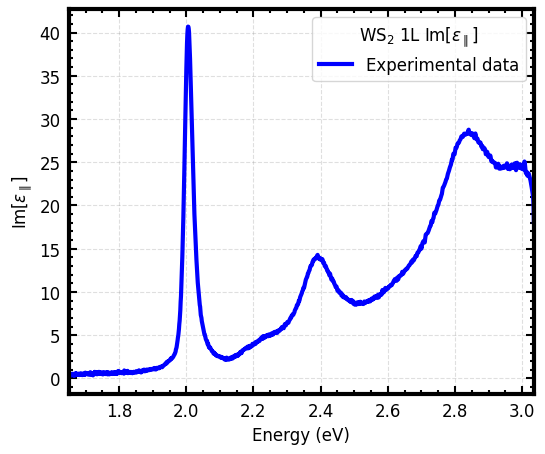

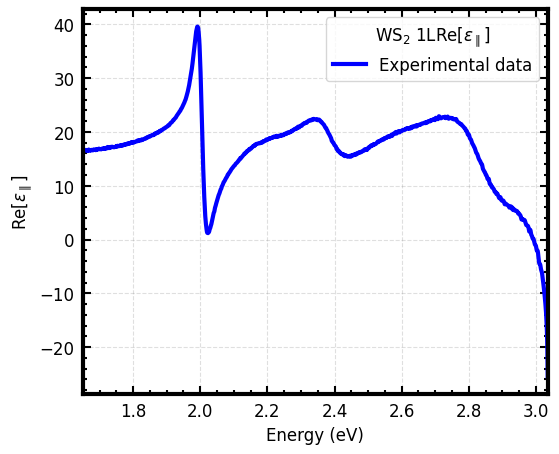

In [ ]:
plt.plot(WS2_1L_inplane_experiment_energy, WS2_1L_inplane_experiment_imag, "b", label="Experimental data")
plt.legend(title = WS2_text + " 1L " + eps_imag_inplane_text);

plt.xlim(min(WS2_1L_inplane_experiment_energy), max(WS2_1L_inplane_experiment_energy));
plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text)

#plt.savefig(output_folder_address + "/Imaginary_part_of_WS2_inplane.png")
plt.show()
plt.close()

plt.plot(WS2_1L_inplane_experiment_energy, WS2_1L_inplane_experiment_real, "b", label="Experimental data")
plt.legend(title = WS2_text + " 1L" + eps_real_inplane_text);

plt.xlim(min(WS2_1L_inplane_experiment_energy), max(WS2_1L_inplane_experiment_energy));
plt.xlabel("Energy (eV)"); plt.ylabel(eps_real_inplane_text)

#plt.savefig(output_folder_address + "/Imaginary_part_of_WS2_inplane.png")
plt.show()
plt.close()

###Fitting the Imaginary Part

In [ ]:
WS2_1L_experimental_eps_imag_initial_guess = [2.012, 2.2, 0.028, 2.40, 4,  0.16, 2.83, 12, 0.23, 3.05, 25, .45, 8.83]

eps_imag_of_WS2_1L_experimental_from_energy = calculate_epsilon_imag_4(WS2_1L_inplane_experiment_energy, *WS2_1L_experimental_eps_imag_initial_guess )

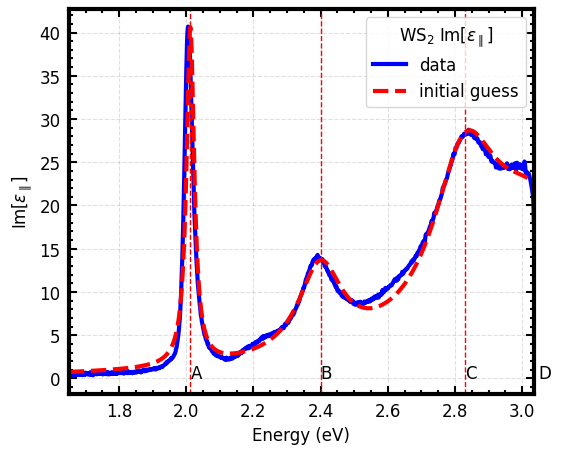

In [ ]:
plt.plot(WS2_1L_inplane_experiment_energy, WS2_1L_inplane_experiment_imag, "b", label="data")

for (x_center, exciton_text) in zip(WS2_1L_experimental_eps_imag_initial_guess[0::3], excitons_list):
  plt.text(x_center, 0, exciton_text, fontsize = plt_label_size)
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)

plt.plot(WS2_1L_inplane_experiment_energy, eps_imag_of_WS2_1L_experimental_from_energy, "--", color= "red", label="initial guess")
plt.legend(title = WS2_text + " " + eps_imag_inplane_text);plt.xlim(min(WS2_1L_inplane_experiment_energy), max(WS2_1L_inplane_experiment_energy))
plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text)
plt.show()

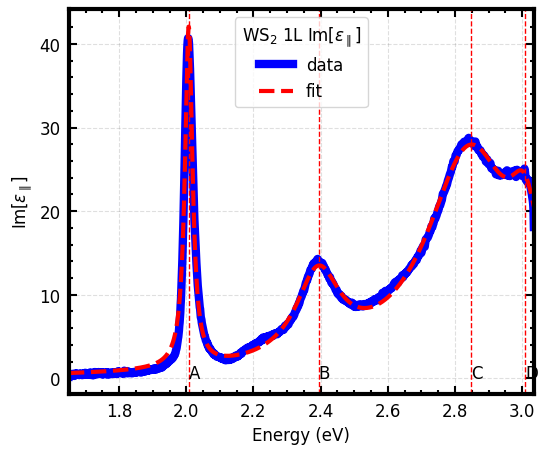

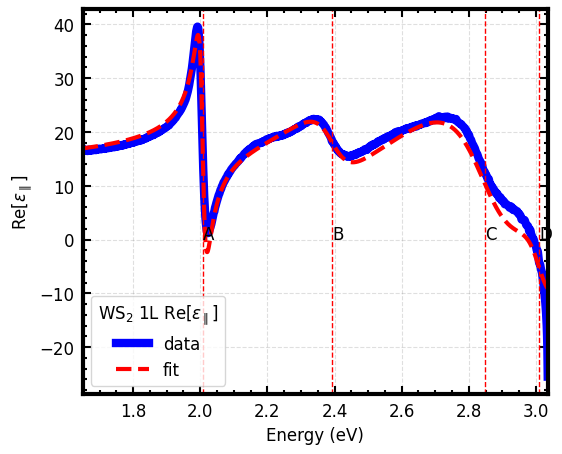

array([ 2.0071298 ,  2.21269044,  0.0271094 ,  2.39384357,  4.03808116,
        0.16302498,  2.84832654, 24.35623303,  0.32408905,  3.00983686,
        3.85905985,  0.11389984,  8.83      ])

In [ ]:
popt_WS2_1L_experimental_imag, pcov = curve_fit(calculate_epsilon_imag_4, WS2_1L_inplane_experiment_energy, WS2_1L_inplane_experiment_imag, WS2_1L_experimental_eps_imag_initial_guess)

WS2_1L_experimantal_imag_from_popt = calculate_epsilon_imag_4(WS2_1L_inplane_experiment_energy, *popt_WS2_1L_experimental_imag)
WS2_1L_experimantal_real_from_popt = calculate_epsilon_real_4(WS2_1L_inplane_experiment_energy, *popt_WS2_1L_experimental_imag)

fit_error_imag = [x-y for x, y in zip(WS2_1L_inplane_experiment_imag, WS2_1L_experimantal_imag_from_popt )]
fit_error_real = [x-y for x, y in zip(WS2_1L_inplane_experiment_real, WS2_1L_experimantal_real_from_popt )]

plt.plot(WS2_1L_inplane_experiment_energy, WS2_1L_inplane_experiment_imag, "b", label = "data", linewidth="6")
plt.plot(WS2_1L_inplane_experiment_energy, WS2_1L_experimantal_imag_from_popt , "r--", label="fit", linewidth="3")
#plt.plot(energy_array, fit_error_imag,"b", label="(data-fit)")
plt.xlim(min(WS2_1L_inplane_experiment_energy), max(WS2_1L_inplane_experiment_energy))

for (x_center, exciton_text) in zip(popt_WS2_1L_experimental_imag[0::3], excitons_list):
  plt.text(x_center, 0, exciton_text, fontsize = plt_label_size)
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)

plt.legend(title = WS2_text + " 1L " + eps_imag_inplane_text); #plt.xlim(1.5, 3.2); plt.ylim(-2.5,35)
plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text)

plt.savefig(output_folder_address + "/Imaginary_fit_for_experimental_WS2_1L_inplane_dielectric.png")
plt.show()
plt.close()



plt.plot(WS2_1L_inplane_experiment_energy, WS2_1L_inplane_experiment_real, "b", label = "data", linewidth="6")
plt.plot(WS2_1L_inplane_experiment_energy, WS2_1L_experimantal_real_from_popt , "r--", label="fit", linewidth="3")
#plt.plot(energy_array, fit_error_real, "b", label="(data-fit)")

for (x_center, exciton_text) in zip(popt_WS2_1L_experimental_imag[0::3], excitons_list):
  plt.text(x_center, 0, exciton_text, fontsize = plt_label_size)
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)

plt.legend(title = WS2_text + " 1L " + eps_real_inplane_text);# plt.xlim(1.5, 3.2); plt.ylim(-2.5,35)
plt.xlabel("Energy (eV)"); plt.ylabel(eps_real_inplane_text)
plt.xlim(min(WS2_1L_inplane_experiment_energy), max(WS2_1L_inplane_experiment_energy))
plt.savefig(output_folder_address + "/Real_fit_for_experimental_WS2_1L_inplane_dielectric.png")
plt.show()
plt.close()

popt_WS2_1L_experimental_imag

#Lorentzian fit of 2L WS$_2$ dielectric function - Literature

##Plot of $\epsilon_{\parallel}$ of 2L WS2

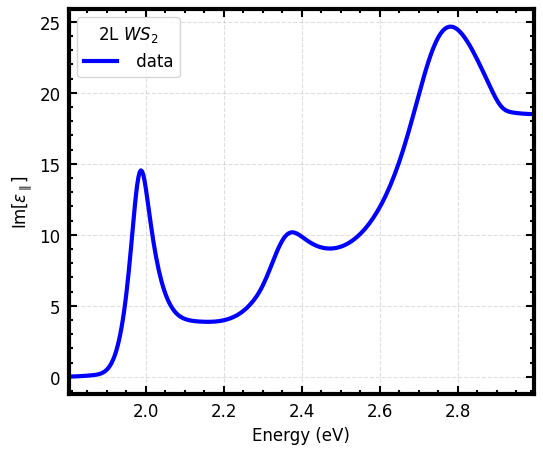

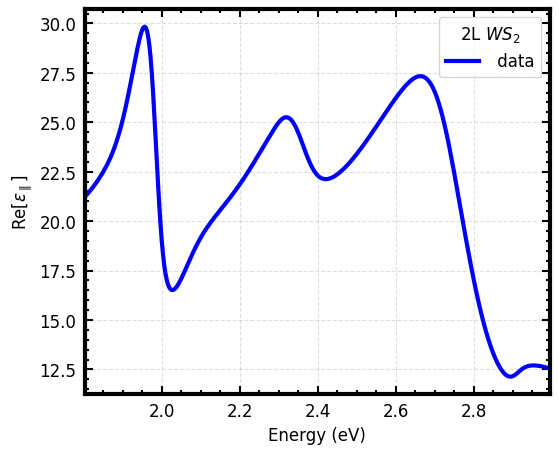

In [ ]:
plt.plot(WS2_2L_energy, WS2_2L_in_plane_imag , "b", label = " data")
plt.legend(title = '2L $WS_2$'); plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text) ; plt.xlim(min(WS2_2L_energy), max(WS2_2L_energy))

plt.savefig(output_folder_address + "/ımaginary_part_of_2L_WS2_inplane.png")
plt.show()
plt.close()

plt.plot(WS2_2L_energy, WS2_2L_in_plane_real, "b", label= " data")
plt.legend(title = '2L $WS_2$'); plt.xlabel("Energy (eV)"); plt.ylabel(eps_real_inplane_text) ; plt.xlim(min(WS2_2L_energy), max(WS2_2L_energy))

plt.savefig(output_folder_address + "/Real_part_of_2L_WS2_inplane.png")
plt.show()
plt.close()


##Fitting the imaginary part

In [ ]:
WS2_2L_eps_imag_initial_guess =  [1.98,  1.98, .067,
                                  2.36, 2.17, .17,
                                  2.74, 8.5, .240,
                                  3, 20, .4

                                  ]

eps_imag_of_2L_WS2_from_energy = calculate_epsilon_imag_N(WS2_2L_energy, *WS2_2L_eps_imag_initial_guess )

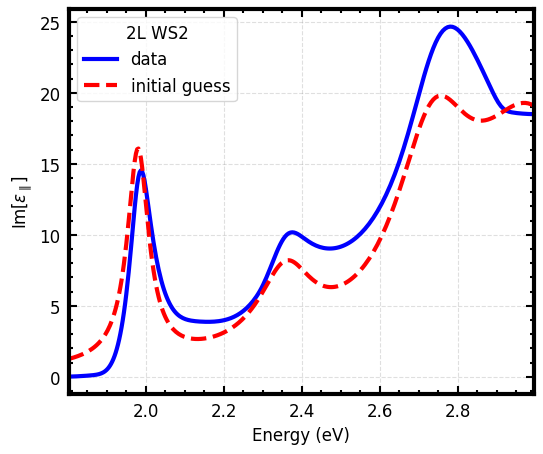

In [ ]:
plt.plot(WS2_2L_energy, WS2_2L_in_plane_imag, "b", label="data")
plt.plot(WS2_2L_energy, eps_imag_of_2L_WS2_from_energy, "--", color= "red", label="initial guess")
plt.xlim([WS2_2L_energy.min(), WS2_2L_energy.max()]) ; plt.legend(title = "2L WS2" ) ; plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text)
plt.show()

In [ ]:
WS2_2L_in_plane_imag_lower_bound = [1.95,  1.9, .065, 2.34, 2.1, .14, 2.7, 7, .2, 2.99, 15, .35]
WS2_2L_in_plane_imag_upper_bound = [2.0,  2, .07, 2.4, 2.3, .2, 2.8, 10, .26, 3.01, 30, .5]

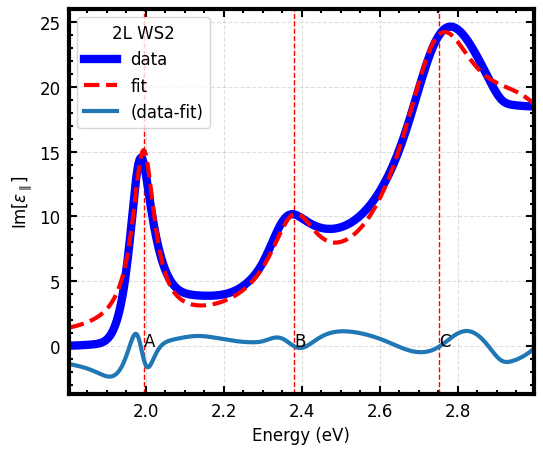

array([ 1.99418549,  1.9       ,  0.07      ,  2.38010765,  2.3       ,
        0.1524028 ,  2.75189073, 10.        ,  0.23939652,  2.99      ,
       23.50803858,  0.5       ])

In [ ]:
WS2_2L_popt_imag, pcov = curve_fit(calculate_epsilon_imag_N, WS2_2L_energy, WS2_2L_in_plane_imag, WS2_2L_eps_imag_initial_guess,  bounds = (WS2_2L_in_plane_imag_lower_bound, WS2_2L_in_plane_imag_upper_bound), maxfev = 15000)

WS2_2L_eps_imag_from_popt = calculate_epsilon_imag_N(WS2_2L_energy, *WS2_2L_popt_imag)


for (x_center, exciton_text) in zip(WS2_2L_popt_imag[0::3], WS2_2L_excitons_list):
  plt.text(x_center, 0, exciton_text, fontsize = plt_label_size)
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)


plt.plot(WS2_2L_energy, WS2_2L_in_plane_imag,  "b", label = "data", linewidth="6")
plt.plot(WS2_2L_energy, WS2_2L_eps_imag_from_popt, "r--", label="fit", linewidth="3")
plt.plot(WS2_2L_energy, WS2_2L_in_plane_imag - WS2_2L_eps_imag_from_popt , label = "(data-fit)")

plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text) ; plt.legend( title = "2L WS2") ; plt.xlim([WS2_2L_energy.min(), WS2_2L_energy.max()]) ;

plt.savefig(output_folder_address + "/Fit_to_imaginary_part_of_2L_WS2_inplane.png")
plt.show()
plt.close()


WS2_2L_popt_imag

##Fitting the real part


In [ ]:
WS2_2L_eps_real_initial_guess =  [12, 1.98, 2, .067,  2.36, 2.5, .173, 2.74, 15, 0.210, 3, 14, 0.4]
eps_real_of_2L_WS2_from_energy = calculate_epsilon_real_N(WS2_2L_energy , *WS2_2L_eps_real_initial_guess)

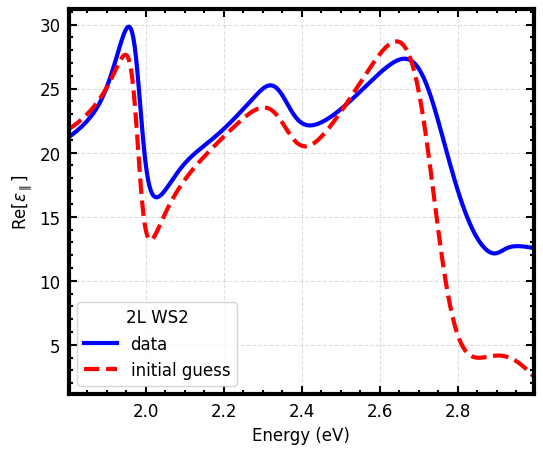

In [ ]:
plt.plot(WS2_2L_energy,  WS2_2L_in_plane_real, "b", label="data")
plt.plot(WS2_2L_energy, eps_real_of_2L_WS2_from_energy, "--", color= "red", label="initial guess")
plt.xlim([WS2_2L_energy.min(), WS2_2L_energy.max()]) ; plt.legend(title = "2L WS2" ) ; plt.xlabel("Energy (eV)"); plt.ylabel(eps_real_inplane_text)
plt.show()

In [ ]:
WS2_2L_in_plane_real_lower_bound = [1, 1.97, 1.98, .0670,  2.355, 1, .17, 2.735, 6, 0.2, 2.99, 6, 0.35]
WS2_2L_in_plane_real_upper_bound = [17, 1.98, 2.5, .0675,  2.365, 3, .175, 2.745, 25, 0.211, 3.01, 25, 0.41]

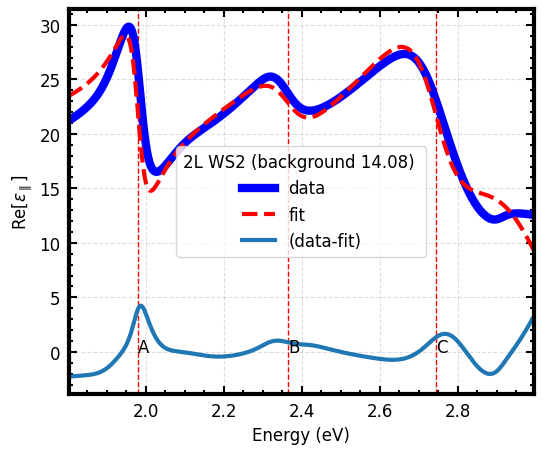

array([14.08259748,  1.98      ,  1.98      ,  0.0675    ,  2.365     ,
        2.17428886,  0.17      ,  2.745     ,  8.58979203,  0.211     ,
        3.01      , 21.57417667,  0.41      ])

In [ ]:
WS2_2L_popt_real, pcov = curve_fit(calculate_epsilon_real_N, WS2_2L_energy, WS2_2L_in_plane_real, WS2_2L_eps_real_initial_guess, bounds = (WS2_2L_in_plane_real_lower_bound, WS2_2L_in_plane_real_upper_bound), maxfev = 10000)

WS2_2L_eps_real_from_popt = calculate_epsilon_real_N(WS2_2L_energy, *WS2_2L_popt_real)

WS2_2L_popt_real_for_imag = np.delete (WS2_2L_popt_real, 0)

for (x_center, exciton_text) in zip(WS2_2L_popt_real_for_imag[0::3], WS2_2L_excitons_list):
  plt.text(x_center, 0, exciton_text, fontsize = plt_label_size)
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)

plt.plot(WS2_2L_energy, WS2_2L_in_plane_real,  "b", label = "data", linewidth="6")
plt.plot(WS2_2L_energy, WS2_2L_eps_real_from_popt, "r--", label="fit", linewidth="3")
plt.plot(WS2_2L_energy, WS2_2L_in_plane_real - WS2_2L_eps_real_from_popt , label = "(data-fit)")

plt.xlabel("Energy (eV)"); plt.ylabel(eps_real_inplane_text) ; plt.legend( title = "2L WS2 (background %.2f) " %WS2_2L_popt_real[0] ) ; plt.xlim([WS2_2L_energy.min(), WS2_2L_energy.max()]) ;

plt.savefig(output_folder_address + "/Fit_to_real_part_of_2L_WS2_inplane.png")
plt.show()
plt.close()


WS2_2L_popt_real

##Comparison of the fits

In [ ]:
WS2_2L_popt_real_for_imag = np.delete (WS2_2L_popt_real, 0)

WS2_2L_popt_imag_for_real = np.insert(WS2_2L_popt_imag ,0,WS2_2L_popt_real[0] )


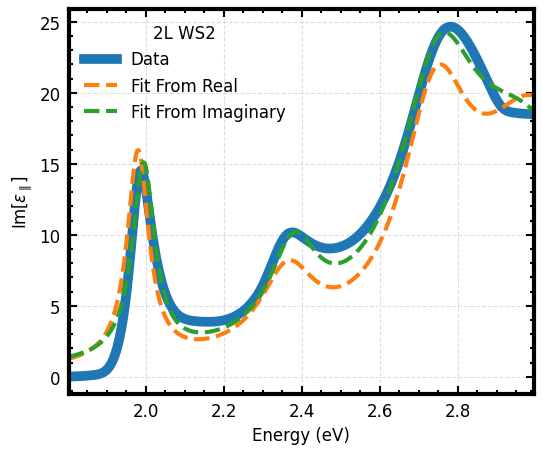

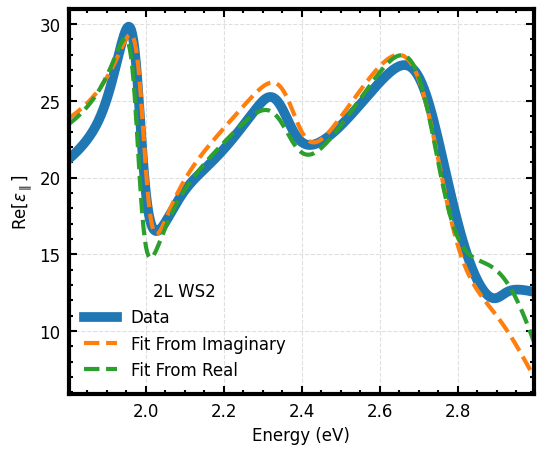

In [ ]:
WS2_2L_eps_imag_from_popt_real = calculate_epsilon_imag_N(WS2_2L_energy, *WS2_2L_popt_real_for_imag)

plt.plot(WS2_2L_energy, WS2_2L_in_plane_imag, label = 'Data' , linewidth = 7)
plt.plot(WS2_2L_energy, WS2_2L_eps_imag_from_popt_real, '--', label = 'Fit From Real')
plt.plot(WS2_2L_energy, WS2_2L_eps_imag_from_popt, '--', label = "Fit From Imaginary")

plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text)
plt.xlim(WS2_2L_energy.min(), WS2_2L_energy.max())
plt.legend( title = "2L WS2", framealpha = 0 )

plt.savefig(output_folder_address + "/Fit_to_imag_part_of_2L_WS2_inplane_from_real.png")
plt.show()
plt.close()



WS2_2L_eps_real_from_popt_imag = calculate_epsilon_real_N(WS2_2L_energy, *WS2_2L_popt_imag_for_real)

plt.plot(WS2_2L_energy, WS2_2L_in_plane_real, label = 'Data' , linewidth = 7)
plt.plot(WS2_2L_energy, WS2_2L_eps_real_from_popt_imag, '--', label = 'Fit From Imaginary')
plt.plot(WS2_2L_energy, WS2_2L_eps_real_from_popt, '--', label = "Fit From Real")

plt.xlabel("Energy (eV)"); plt.ylabel(eps_real_inplane_text)
plt.xlim(WS2_2L_energy.min(), WS2_2L_energy.max())
plt.legend( title = "2L WS2", framealpha = 0 )
plt.savefig(output_folder_address + "/Fit_to_real_part_of_2L_WS2_inplane_from_imaginary.png")
plt.show()
plt.close()


### Energy and width from experiment, oscillator strength from fits

In [ ]:
popt_imag

array([2.01224425e+00, 1.73180962e+00, 2.82172728e-02, 2.40432198e+00,
       3.39145926e+00, 1.77130753e-01, 2.83322673e+00, 9.74524258e+00,
       2.47734442e-01, 3.07590972e+00, 3.20447898e+01, 5.43142132e-01,
       8.83000000e+00])

In [ ]:
WS2_2L_mixed_dielectric_real = np.array([WS2_2L_exciton_peaks_from_experiment[0] ,  popt_real[1], WS2_2L_exciton_widths_from_experiment[0],
                                         WS2_2L_exciton_peaks_from_experiment[1], popt_real[4], WS2_2L_exciton_widths_from_experiment[1],
                                         WS2_2L_exciton_peaks_from_experiment[2], popt_real[7], WS2_2L_exciton_widths_from_experiment[2],
                                         WS2_2L_exciton_peaks_from_experiment[3], popt_real[10], WS2_2L_exciton_widths_from_experiment[3]])

WS2_2L_mixed_dielectric_imag = np.array([WS2_2L_exciton_peaks_from_experiment[0] ,  popt_imag[1], WS2_2L_exciton_widths_from_experiment[0],
                                         WS2_2L_exciton_peaks_from_experiment[1], popt_imag[4], WS2_2L_exciton_widths_from_experiment[1],
                                         WS2_2L_exciton_peaks_from_experiment[2], popt_imag[7], WS2_2L_exciton_widths_from_experiment[2],
                                         WS2_2L_exciton_peaks_from_experiment[3], popt_imag[10], WS2_2L_exciton_widths_from_experiment[3]])

WS2_2L_mixed_dielectric_imag_with_background = np.insert(WS2_2L_mixed_dielectric_imag ,0,WS2_2L_popt_real[0] )
WS2_2L_mixed_dielectric_real_with_background = np.insert(WS2_2L_mixed_dielectric_real ,0,WS2_2L_popt_real[0] )

In [ ]:
popt_imag

array([2.01224425e+00, 1.73180962e+00, 2.82172728e-02, 2.40432198e+00,
       3.39145926e+00, 1.77130753e-01, 2.83322673e+00, 9.74524258e+00,
       2.47734442e-01, 3.07590972e+00, 3.20447898e+01, 5.43142132e-01,
       8.83000000e+00])

In [ ]:
WS2_2L_mixed_dielectric_imag

array([ 1.98      ,  1.73180962,  0.067     ,  2.36      ,  3.39145926,
        0.173     ,  2.74      ,  9.74524258,  0.24      ,  3.        ,
       32.04478976,  0.4       ])

In [ ]:
popt_imag[4]/popt_imag[1], popt_imag[7]/popt_imag[1], popt_imag[10]/popt_imag[1]

(1.9583326129002727, 5.627202011796429, 18.503644609541727)

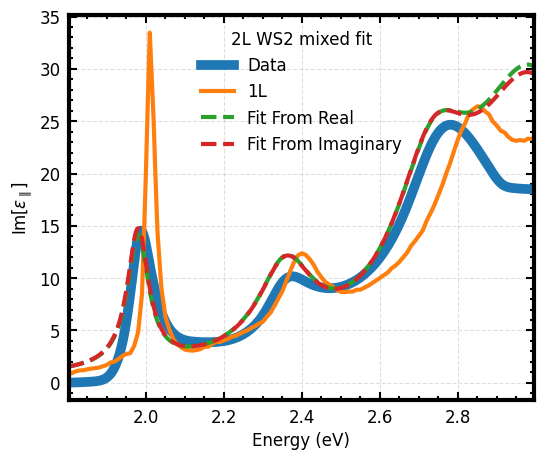

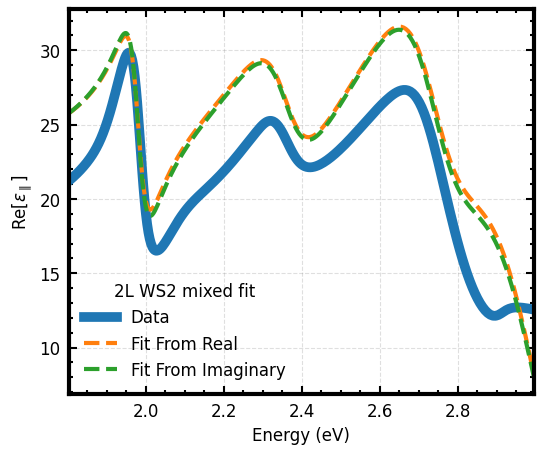

In [ ]:
WS2_2L_mixed_imag_dielectric_fit_from_real = calculate_epsilon_imag_N(WS2_2L_energy, *WS2_2L_mixed_dielectric_real)
WS2_2L_mixed_imag_dielectric_fit_from_imag  = calculate_epsilon_imag_N(WS2_2L_energy, *WS2_2L_mixed_dielectric_imag)

plt.plot(WS2_2L_energy, WS2_2L_in_plane_imag, label = 'Data' , linewidth = 7)
plt.plot(drive_energy_array, epsilon_from_nk(n_WS2, k_WS2).imag, label = '1L')
plt.plot(WS2_2L_energy, WS2_2L_mixed_imag_dielectric_fit_from_real, '--', label = 'Fit From Real')
plt.plot(WS2_2L_energy, WS2_2L_mixed_imag_dielectric_fit_from_imag, '--', label = "Fit From Imaginary")

plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text)
plt.xlim(WS2_2L_energy.min(), WS2_2L_energy.max())
plt.legend( title = "2L WS2 mixed fit", framealpha = 0 )

plt.savefig(output_folder_address + "/Mixed_fit_to_imag_part_of_2L_WS2_inplane_from_real.png")
plt.show()
plt.close()

WS2_2L_mixed_real_dielectric_fit_from_real = calculate_epsilon_real_N(WS2_2L_energy,  *WS2_2L_mixed_dielectric_real_with_background)
WS2_2L_mixed_real_dielectric_fit_from_imag  = calculate_epsilon_real_N(WS2_2L_energy, *WS2_2L_mixed_dielectric_imag_with_background)

plt.plot(WS2_2L_energy, WS2_2L_in_plane_real, label = 'Data' , linewidth = 7)
plt.plot(WS2_2L_energy, WS2_2L_mixed_real_dielectric_fit_from_real, '--', label = 'Fit From Real')
plt.plot(WS2_2L_energy, WS2_2L_mixed_real_dielectric_fit_from_imag, '--', label = "Fit From Imaginary")

plt.xlabel("Energy (eV)"); plt.ylabel(eps_real_inplane_text)
plt.xlim(WS2_2L_energy.min(), WS2_2L_energy.max())
plt.legend( title = "2L WS2 mixed fit", framealpha = 0 )

plt.savefig(output_folder_address + "/mixed_fit_to_imag_part_of_2L_WS2_inplane_from_real.png")
plt.show()
plt.close()


#Lorentzian fit of 2L WS$_2$ dielectric function - Experiment

###Plot of 𝛆

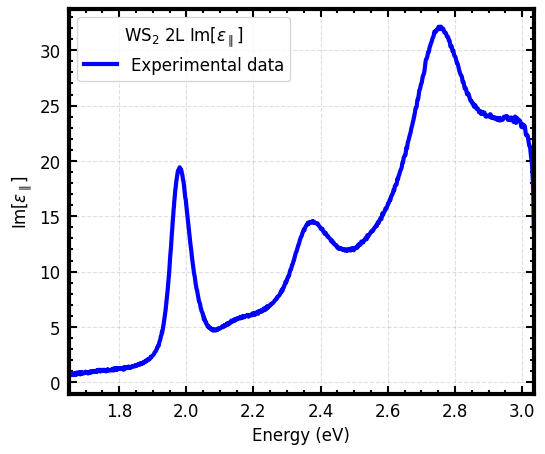

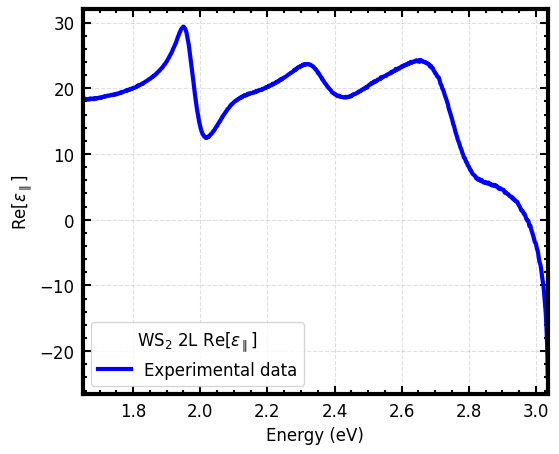

In [ ]:
plt.plot(WS2_2L_inplane_experiment_energy, WS2_2L_inplane_experiment_imag, "b", label="Experimental data")
plt.legend(title = WS2_text + " 2L " + eps_imag_inplane_text, loc = "upper left");

plt.xlim(min(WS2_2L_inplane_experiment_energy), max(WS2_2L_inplane_experiment_energy));
plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text)

#plt.savefig(output_folder_address + "/Imaginary_part_of_WS2_inplane.png")
plt.show()
plt.close()

plt.plot(WS2_2L_inplane_experiment_energy, WS2_2L_inplane_experiment_real, "b", label="Experimental data")
plt.legend(title = WS2_text + " 2L " + eps_real_inplane_text);

plt.xlim(min(WS2_2L_inplane_experiment_energy), max(WS2_2L_inplane_experiment_energy));
plt.xlabel("Energy (eV)"); plt.ylabel(eps_real_inplane_text)

#plt.savefig(output_folder_address + "/Imaginary_part_of_WS2_inplane.png")
plt.show()
plt.close()

###Fitting the imaginary part

In [ ]:
WS2_2L_experimental_eps_imag_initial_guess = [1.98, 1.5  , 0.043, 2.37, 4,  0.16, 2.74, 15, 0.23, 3.01, 25, .45, 8.83]

eps_imag_of_WS2_2L_experimental_from_energy = calculate_epsilon_imag_4(WS2_2L_inplane_experiment_energy, *WS2_2L_experimental_eps_imag_initial_guess )

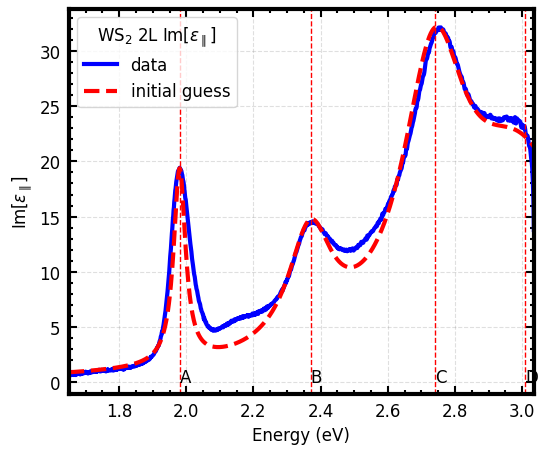

In [ ]:
plt.plot(WS2_2L_inplane_experiment_energy, WS2_2L_inplane_experiment_imag, "b", label="data")

for (x_center, exciton_text) in zip(WS2_2L_experimental_eps_imag_initial_guess[0::3], excitons_list):
  plt.text(x_center, 0, exciton_text, fontsize = plt_label_size)
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)

plt.plot(WS2_2L_inplane_experiment_energy, eps_imag_of_WS2_2L_experimental_from_energy, "--", color= "red", label="initial guess")
plt.legend(title = WS2_text + " 2L " + eps_imag_inplane_text);plt.xlim(min(WS2_2L_inplane_experiment_energy), max(WS2_2L_inplane_experiment_energy))
plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text)
plt.show()

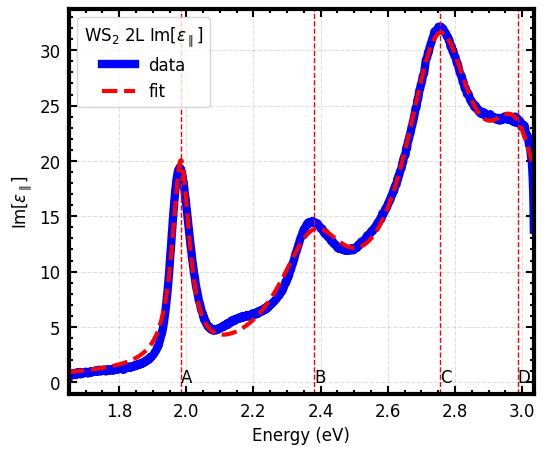

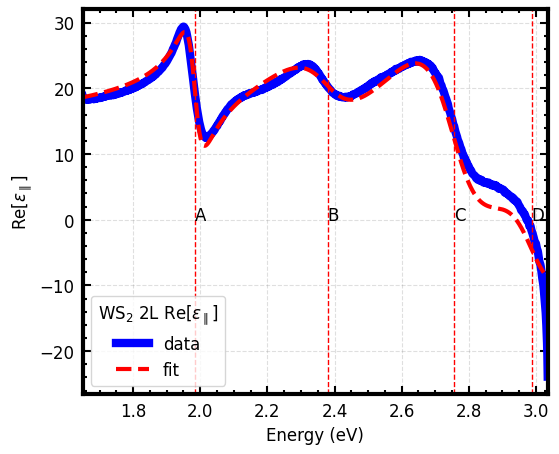

array([ 1.98386947,  2.22827004,  0.06201945,  2.3801581 ,  6.14048435,
        0.256885  ,  2.75548002, 20.04011811,  0.26807244,  2.98690642,
       11.50177591,  0.23300196,  8.83      ])

In [ ]:
popt_WS2_2L_experimental_imag, pcov = curve_fit(calculate_epsilon_imag_4, WS2_2L_inplane_experiment_energy, WS2_2L_inplane_experiment_imag, WS2_2L_experimental_eps_imag_initial_guess)

WS2_2L_experimantal_imag_from_popt = calculate_epsilon_imag_4(WS2_2L_inplane_experiment_energy, *popt_WS2_2L_experimental_imag)
WS2_2L_experimantal_real_from_popt = calculate_epsilon_real_4(WS2_2L_inplane_experiment_energy, *popt_WS2_2L_experimental_imag)

fit_error_imag = [x-y for x, y in zip(WS2_2L_inplane_experiment_imag, WS2_2L_experimantal_imag_from_popt )]
fit_error_real = [x-y for x, y in zip(WS2_2L_inplane_experiment_real, WS2_2L_experimantal_real_from_popt )]

plt.plot(WS2_2L_inplane_experiment_energy, WS2_2L_inplane_experiment_imag, "b", label = "data", linewidth="6")
plt.plot(WS2_2L_inplane_experiment_energy, WS2_2L_experimantal_imag_from_popt , "r--", label="fit", linewidth="3")
#plt.plot(energy_array, fit_error_imag,"b", label="(data-fit)")
plt.xlim(min(WS2_2L_inplane_experiment_energy), max(WS2_2L_inplane_experiment_energy))

for (x_center, exciton_text) in zip(popt_WS2_2L_experimental_imag[0::3], excitons_list):
  plt.text(x_center, 0, exciton_text, fontsize = plt_label_size)
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)

plt.legend(title = WS2_text + " 2L " + eps_imag_inplane_text); #plt.xlim(1.5, 3.2); plt.ylim(-2.5,35)
plt.xlabel("Energy (eV)"); plt.ylabel(eps_imag_inplane_text)

plt.savefig(output_folder_address + "/Imaginargy_fit_for_experimental_WS2_2L_inplane_dielectric.png")
plt.show()
plt.close()


plt.plot(WS2_2L_inplane_experiment_energy, WS2_2L_inplane_experiment_real, "b", label = "data", linewidth="6")
plt.plot(WS2_2L_inplane_experiment_energy, WS2_2L_experimantal_real_from_popt , "r--", label="fit", linewidth="3")
#plt.plot(energy_array, fit_error_real, "b", label="(data-fit)")

for (x_center, exciton_text) in zip(popt_WS2_2L_experimental_imag[0::3], excitons_list):
  plt.text(x_center, 0, exciton_text, fontsize = plt_label_size)
  plt.axvline( x = x_center, color = 'red', ls= '--', lw= 1)

plt.legend(title = WS2_text + " 2L " + eps_real_inplane_text);# plt.xlim(1.5, 3.2); plt.ylim(-2.5,35)
plt.xlabel("Energy (eV)"); plt.ylabel(eps_real_inplane_text)
plt.xlim(min(WS2_2L_inplane_experiment_energy), max(WS2_2L_inplane_experiment_energy))
plt.savefig(output_folder_address + "/Real_fit_for_experimental_WS2_2L_inplane_dielectric.png")
plt.show()
plt.close()

popt_WS2_2L_experimental_imag

#Strain dependent in-plane dielectric functions

##WS$_2$ 1L

### Pick which fitting's result to use

Fit from experimental data

In [ ]:
"""oscillator_function_array = popt_WS2_1L_experimental_imag# popt_imag;
energy_array = WS2_1L_inplane_experiment_energy
QD_gaussian_PL = gauss(energy_array, *QD_PL_gauss_fit_params) # gaussian fit"""


'oscillator_function_array = popt_WS2_1L_experimental_imag# popt_imag;\nenergy_array = WS2_1L_inplane_experiment_energy\nQD_gaussian_PL = gauss(energy_array, *QD_PL_gauss_fit_params) # gaussian fit'

Fit from Literature

In [ ]:
oscillator_function_array = popt_imag # popt_imag;
energy_array = drive_energy_array

# Recalculate QD PL with the choice of the energy range
QD_gaussian_PL = gauss(energy_array, *QD_PL_gauss_fit_params) # gaussian fit



In [ ]:
data_to_export_pd = pd.DataFrame()
data_to_export_pd["PL of Quantum Dot, (norm.), , "] = QD_gaussian_PL  # spaces are added to match the number of header rows in other columns
data_to_export_pd.insert(0, "Energy, (eV), , ", energy_array)

### Plot Strain-dependent ε

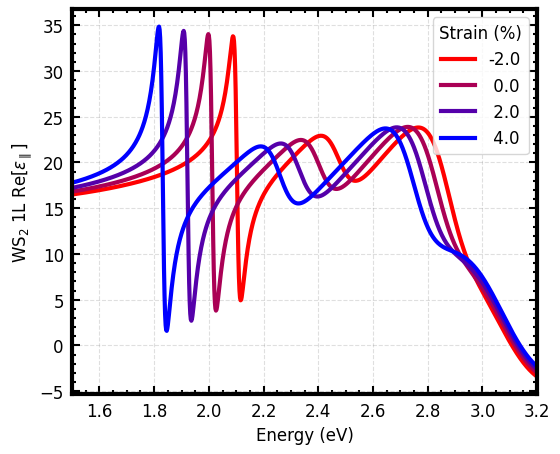

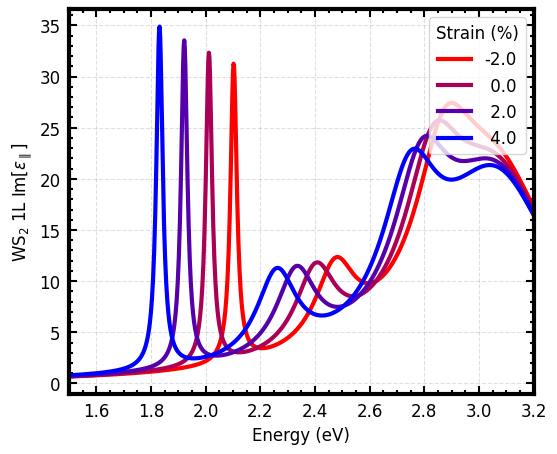

In [ ]:
strain_range = np.arange(-2, 5, 2); blue_red_color_list = []; blue_red_color_list = colors_BR(len(strain_range))


for strain in strain_range:
    real_part_in_plane_dielectric = In_plane_strain(oscillator_function_array, strain, energy_array)[0]
    plt.plot(energy_array, real_part_in_plane_dielectric, color = blue_red_color_list[ np.where(strain_range == strain)[0][0] ], label='% .1f' %strain)
    data_to_export_pd["WS2, In-plane Dielectric Function, Real Part, Strain = % .1f%%" %strain] = real_part_in_plane_dielectric

plt.xlabel('Energy (eV)'); plt.ylabel(WS2_text + " 1L " + eps_real_inplane_text); plt.legend(title = "Strain (%)", loc="upper right");
plt.xlim([min(energy_array), max(energy_array)]);#plt.ylim([-2, 44]);
plt.savefig(output_folder_address + "/Real_part_of_inplace_dielectric_under_strain_WS2.png")
plt.show()
plt.close()

for strain in strain_range:
    imag_part_in_plane_dielectric = In_plane_strain(oscillator_function_array, strain, energy_array)[1]
    plt.plot(energy_array, imag_part_in_plane_dielectric, color = blue_red_color_list[ np.where(strain_range == strain)[0][0] ], label='% .1f' %strain)
    data_to_export_pd["WS2, In-plane Dielectric Function, Imaginary Part, Strain = % .1f%%" %strain] = imag_part_in_plane_dielectric

plt.xlabel('Energy (eV)'); plt.ylabel(WS2_text + " 1L " + eps_imag_inplane_text); plt.legend(title = "Strain (%)", loc="upper right");
plt.xlim([min(energy_array), max(energy_array)]); #plt.ylim([-2, 44]);
plt.savefig(output_folder_address + "/Imaginary_part_of_inplace_dielectric_under_strain_WS2.png")
plt.show()
plt.close()




### Plot Strain-dependent ε and QD Photoluminescence

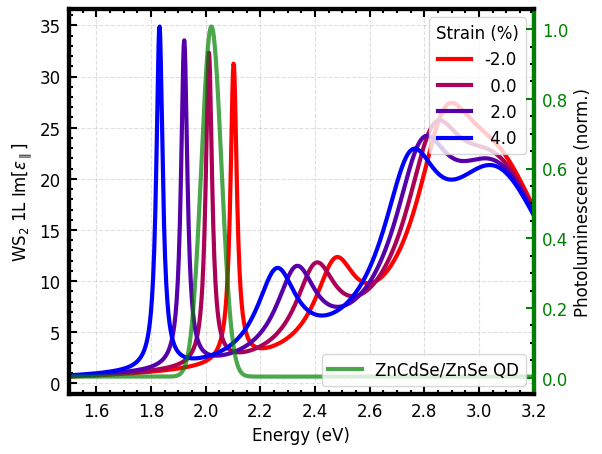

In [ ]:
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()

strain_range = np.arange(-2, 5, 2); blue_red_color_list = []; blue_red_color_list = colors_BR(len(strain_range))


for strain in strain_range:

  ax1.plot(energy_array, In_plane_strain(oscillator_function_array, strain, energy_array)[1], color = blue_red_color_list[ np.where(strain_range == strain)[0][0] ], label='% .1f' %strain)

ax2.plot(energy_array, QD_gaussian_PL, "green", alpha=0.7, label = QD_name + ' QD')

# plt.title("1L WS$_2$ $\epsilon^{''}_{\parallel}$")

ax1.set_xlabel('Energy (eV)'); ax1.set_ylabel(WS2_text + " 1L " + eps_imag_inplane_text); ax2.set_ylabel('Photoluminescence (norm.)')

ax2.spines['right'].set_color('g'); ax2.grid(visible = False); ax2.tick_params(axis='y', colors='g')

plt.xlim([min(energy_array), max(energy_array)]); #ax2.set_ylim([-0.01, 1.1]); ax1.set_ylim([-0.4, 44])

ax1.legend(title = "Strain (%)", loc="upper right"); ax2.legend(loc="lower right");
plt.savefig(output_folder_address + "/Imaginary_part_of_inplace_dielectric_under_strain_WS2_with_QD.png")
plt.show()
plt.close()



##WS$_2$ 2L

###Pick which fitting's result to use

In [ ]:
oscillator_function_array_WS2_2L = popt_WS2_2L_experimental_imag
energy_array_WS2_2L = WS2_2L_inplane_experiment_energy

# Recalculate QD PL with the choice of the energy range
WS2_2L_QD_gaussian_PL = gauss(energy_array_WS2_2L, *QD_PL_gauss_fit_params) # gaussian fit

In [ ]:
oscillator_function_array_WS2_2L

array([ 1.98386947,  2.22827004,  0.06201945,  2.3801581 ,  6.14048435,
        0.256885  ,  2.75548002, 20.04011811,  0.26807244,  2.98690642,
       11.50177591,  0.23300196,  8.83      ])

###Plot strain dependent ε

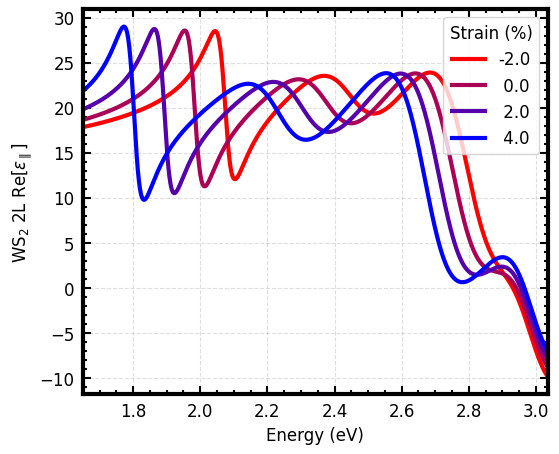

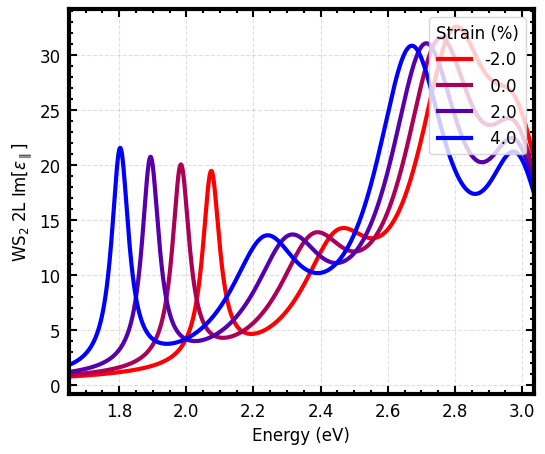

In [ ]:
strain_range = np.arange(-2, 5, 2); blue_red_color_list = []; blue_red_color_list = colors_BR(len(strain_range))


for strain in strain_range:
    plt.plot(energy_array_WS2_2L, In_plane_strain(oscillator_function_array_WS2_2L, strain, energy_array_WS2_2L)[0], color = blue_red_color_list[ np.where(strain_range == strain)[0][0] ], label='% .1f' %strain)

plt.xlabel('Energy (eV)'); plt.ylabel(WS2_text + " 2L " + eps_real_inplane_text); plt.legend(title = "Strain (%)", loc="upper right");
plt.xlim([min(energy_array_WS2_2L), max(energy_array_WS2_2L)]);#plt.ylim([-2, 44]);
plt.savefig(output_folder_address + "/Real_part_of_inplace_dielectric_under_strain_2L_WS2.png")
plt.show()
plt.close()

for strain in strain_range:
    plt.plot(energy_array_WS2_2L, In_plane_strain(oscillator_function_array_WS2_2L, strain, energy_array_WS2_2L)[1], color = blue_red_color_list[ np.where(strain_range == strain)[0][0] ], label='% .1f' %strain)

plt.xlabel('Energy (eV)'); plt.ylabel(WS2_text + " 2L " + eps_imag_inplane_text); plt.legend(title = "Strain (%)", loc="upper right");
plt.xlim([min(energy_array_WS2_2L), max(energy_array_WS2_2L)]); #plt.ylim([-2, 44]);
plt.savefig(output_folder_address + "/Imaginary_part_of_inplace_dielectric_under_strain_2L_WS2.png")
plt.show()
plt.close()


###Plot Strain-Dependent ε and QD Photoluminescence

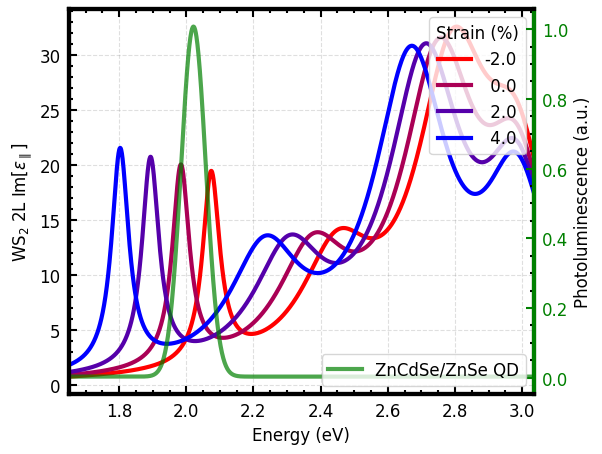

In [ ]:
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()

strain_range = np.arange(-2, 5, 2); blue_red_color_list = []; blue_red_color_list = colors_BR(len(strain_range))


for strain in strain_range:

  ax1.plot(energy_array_WS2_2L, In_plane_strain(oscillator_function_array_WS2_2L, strain, energy_array_WS2_2L, WS2_2L_excitons_vs_strain)[1], color = blue_red_color_list[ np.where(strain_range == strain)[0][0] ], label='% .1f' %strain)

ax2.plot(energy_array_WS2_2L, WS2_2L_QD_gaussian_PL, "green", alpha=0.7, label = QD_name + ' QD')

# plt.title("1L WS$_2$ $\epsilon^{''}_{\parallel}$")

ax1.set_xlabel('Energy (eV)'); ax1.set_ylabel(WS2_text + " 2L " + eps_imag_inplane_text); ax2.set_ylabel('Photoluminescence (norm.)')

ax2.spines['right'].set_color('g'); ax2.grid(visible = False); ax2.tick_params(axis='y', colors='g')
plt.xlim([energy_array_WS2_2L.min() , energy_array_WS2_2L.max()]); #ax2.set_ylim([-0.01, 1.1]); #ax1.set_ylim([-0.4, 44])

ax1.legend(title = "Strain (%)", loc="upper right"); ax2.legend(loc="lower right");
plt.savefig(output_folder_address + "/Imaginary_part_of_inplace_dielectric_under_strain_WS2_2L_with_QD.png")
plt.show()
plt.close()



#**Strain dependent NRET Between Bilayer WS$_2$ and Cd/Se Quantum Dot**

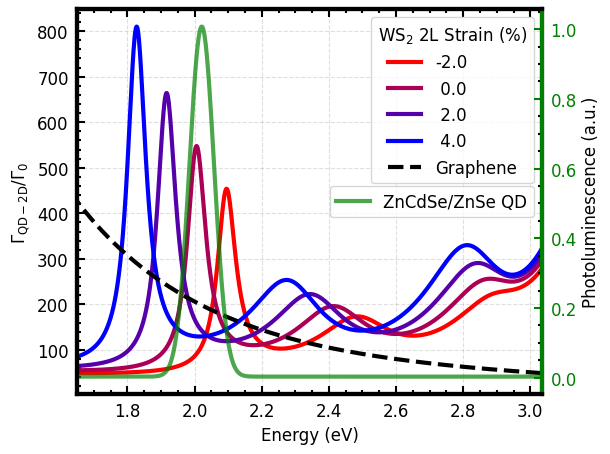

In [ ]:
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()

strain_range = np.arange(-2, 5, 2); blue_red_color_list = []; blue_red_color_list = colors_BR(len(strain_range))

for strain in strain_range:
  ax1.plot(energy_array_WS2_2L, calculate_QD_2D_NRET_dipole_norm(oscillator_function_array_WS2_2L, strain, energy_array = energy_array_WS2_2L, t_2D = 2*t_2D, exciton_positions_change_under_strain = WS2_2L_excitons_vs_strain), color = blue_red_color_list[ np.where(strain_range == strain)[0][0] ], label='% .1f' %strain)
ax1.plot(drive_energy_array, calculate_QD_2D_NRET_dipole_norm(epsilon_from_nk(n_Graphene, k_Graphene), energy_array = drive_energy_array, eps_out = eps_outplane_Graphene, peak = 0, t_2D = t_2D_Graphene), label="Graphene", color = "k", ls="--")
ax2.plot(energy_array_WS2_2L, WS2_2L_QD_gaussian_PL, "green", alpha = 0.7, label= QD_name + ' QD')

# plt.title("Strain dependence of normalized NRET rate  between \n CdSe/ZnS QD (590 nm) and monolayer WS2\n")

ax1.set_xlabel('Energy (eV)'); ax1.set_ylabel(QD_2D_NRET_dipole_norm_text ); ax2.set_ylabel('Photoluminescence (norm.)')

ax2.spines['right'].set_color('g'); ax2.grid(visible = False); ax2.tick_params(axis='y', colors='g')

plt.xlim([energy_array_WS2_2L.min() , energy_array_WS2_2L.max()]);# ax2.set_ylim([-0.01, 1.1]); ax1.set_ylim([-7, 2200])

#plt.title('\n Strain Dependence of Normalized NRET rate between \n %s QD and monolayer $WS_2$ \n (Monolayer Graphene to compare)\n' %QD_name)
ax1.legend(title="WS$_2$ 2L Strain (%)"); ax2.legend(loc="center right");
plt.savefig(output_folder_address + "/Strain_dependent_vacuum_NRET_with_QD_WS2_2L_and_graphene.png", bbox_inches='tight')
plt.show()
plt.close()

## NRET×QD PL

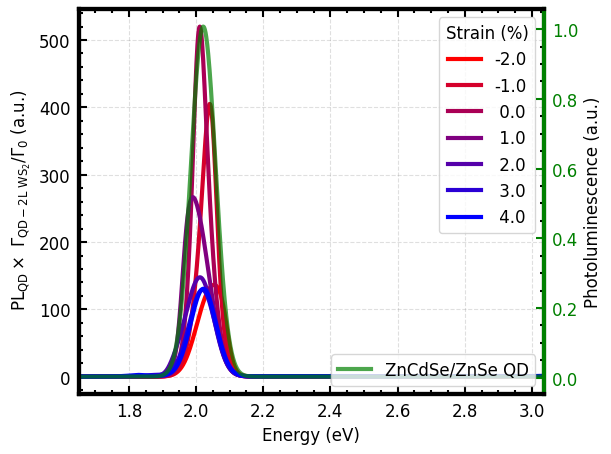

In [ ]:
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()

strain_range = np.arange(-2, 4.5, 1); blue_red_color_list = []; blue_red_color_list = colors_BR(len(strain_range))

for strain in strain_range:

  ax1.plot(energy_array_WS2_2L, calculate_QD_2D_NRET_dipole_norm(oscillator_function_array_WS2_2L, strain, energy_array = energy_array_WS2_2L, exciton_positions_change_under_strain = WS2_2L_excitons_vs_strain, t_2D = t_2D * 2) *  WS2_2L_QD_gaussian_PL, color = blue_red_color_list[ np.where(strain_range == strain)[0][0] ], label='% .1f' %strain)

ax2.plot(energy_array_WS2_2L, WS2_2L_QD_gaussian_PL, "green", alpha=0.7, label= QD_name + ' QD')

# plt.title("Strain dependence of normalized NRET rate $\Gamma/\Gamma_0}$ between \n CdSe/ZnS QD (590 nm) and monolayer WS2\n")

ax1.set_xlabel('Energy (eV)'); ax1.set_ylabel(" $\mathrm{PL_{QD}} \\times$ " + QD_2L_WS2_NRET_dipole_norm_text + " (norm.)"); ax2.set_ylabel('Photoluminescence (norm.)')

ax2.spines['right'].set_color('g'); ax2.grid(visible = False); ax2.tick_params(axis='y', colors='g')

plt.xlim([energy_array_WS2_2L.min() , energy_array_WS2_2L.max()]); #ax2.set_ylim([-0.05, 1.1]); #ax1.set_ylim([-25, 1500])

ax1.legend(title = "Strain (%)"); ax2.legend(loc="lower right")
plt.savefig(output_folder_address + "/Strain_dependent_NRET_normed_with_QD_2L_WS2.png")
plt.show()
plt.close()

##Total NRET×QD PL

In [ ]:
energy_range = np.linspace(energy_array_WS2_2L.min(), energy_array_WS2_2L.max(), 100)

qd_strain_range = np.arange(-2, 8, .1)

WS2_2L_QD_2D_NRET_dipole_norm_total_list = []

for strain in qd_strain_range:

  WS2_2L_QD_2D_NRET_dipole_norm_total_list.append(calculate_QD_2D_NRET_dipole_norm_total( strain, energy_range, QD_PL_gauss_fit_params, oscillator_function_array = oscillator_function_array_WS2_2L, t_2D = 2* t_1L_WS2))

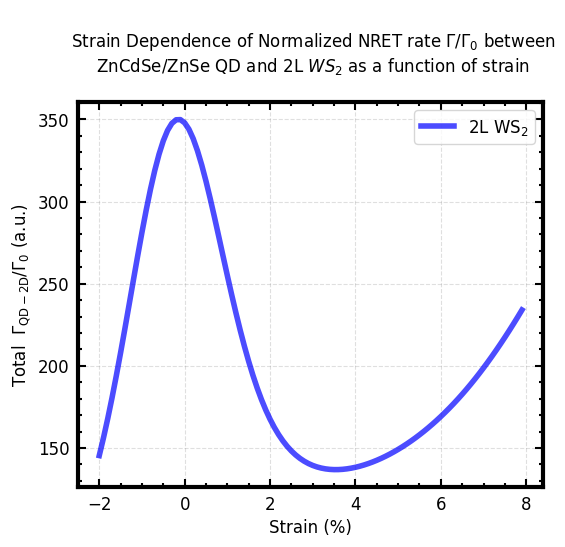

In [ ]:
plt.plot(qd_strain_range, WS2_2L_QD_2D_NRET_dipole_norm_total_list, "-", label = '2L '+ WS2_text, color = "b", lw = 4,  alpha = 0.7)

#plt.title("Strain dependence of normalized NRET rate $\Gamma/\Gamma_0}$ between \n CdSe/ZnS QD (590 nm) and monolayer WS2\n")
plt.xlabel('Strain (%)'); plt.ylabel("Total  " + QD_2D_NRET_dipole_norm_text + " (norm.)")
plt.legend(title = "", loc="upper right");
#plt.xlim(-1,4); #plt.ylim(0,50)
plt.title('\n Strain Dependence of Normalized NRET rate $\Gamma/\Gamma_0$ between\n %s QD and 2L $WS_2$ as a function of strain\n' %QD_name)
plt.savefig(output_folder_address + "/total_NRET_as_function_of_strain_2L_WS2.png", bbox_inches='tight')
plt.show()
plt.close()

#**Strain dependent NRET Between Monolayer WS$_2$ and Cd/Se Quantum Dot**

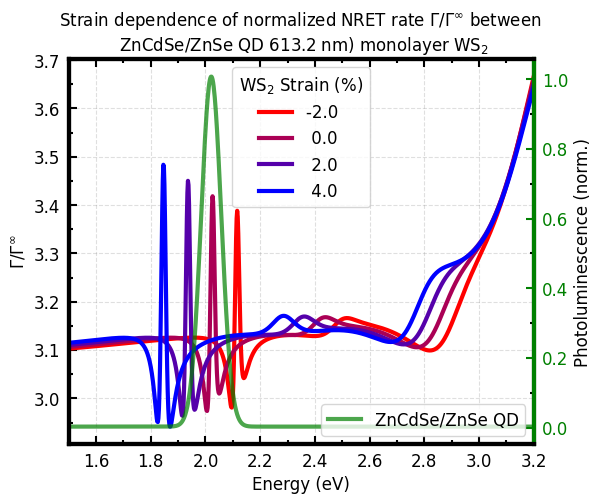

In [ ]:
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()

strain_range = np.arange(-2, 5, 2); blue_red_color_list = []; blue_red_color_list = colors_BR(len(strain_range))


# Set # of minor ticks
ax1.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

ax2.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))


for strain in strain_range:

  ax1.plot(energy_array, QD_2D_NRET_bulk_norm(oscillator_function_array, strain, energy_array), color = blue_red_color_list[ np.where(strain_range == strain)[0][0] ] , label='% .1f ' %strain)

ax2.plot(energy_array, QD_gaussian_PL, "green", alpha=0.7, label= QD_name + ' QD')

plt.xlim([min(energy_array), max(energy_array)]);# ax2.set_ylim([-0.01, 1.1]); ax1.set_ylim([-0.05, 5.5])

ax1.set_xlabel('Energy (eV)'); ax1.set_ylabel("$\Gamma/ \Gamma^{\infty}$"); ax2.set_ylabel('Photoluminescence (norm.)')

plt.title("Strain dependence of normalized NRET rate $\Gamma/\Gamma^{\infty}$ between \n " + QD_name + " QD " + str(peak_nm) + " nm) monolayer " + WS2_text)

ax2.spines['right'].set_color('g'); ax2.grid(None); ax2.tick_params(axis='y', colors='g')

ax1.legend(title="WS$_2$ Strain (%)"); ax2.legend(loc="lower right");

plt.savefig(output_folder_address + "/Strain_dependent_bulk_NRET_with_QD_WS2.png")
plt.show()
plt.close()



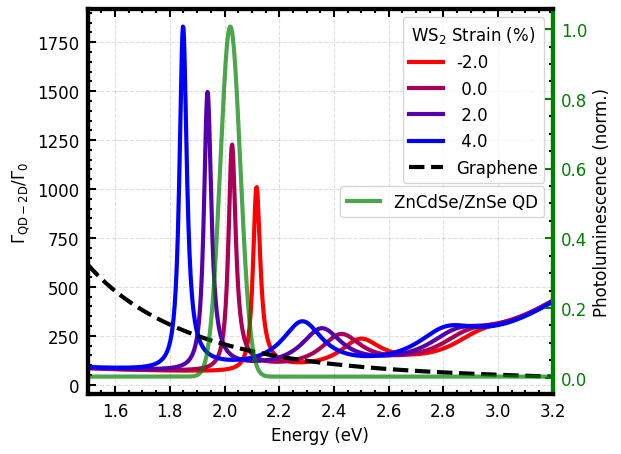

In [ ]:
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()

strain_range = np.arange(-2, 5, 2); blue_red_color_list = []; blue_red_color_list = colors_BR(len(strain_range))

for strain in strain_range:
  QD_2D_NRET_dipole_norm = calculate_QD_2D_NRET_dipole_norm(oscillator_function_array, strain, energy_array = energy_array)
  ax1.plot(energy_array, QD_2D_NRET_dipole_norm, color = blue_red_color_list[ np.where(strain_range == strain)[0][0] ], label='% .1f' %strain)
  data_to_export_pd["WS2 to QD, Normalized NRET rate, , Strain = % .1f%%" %strain] = QD_2D_NRET_dipole_norm

# Calculate for graphene for comparison
QD_2D_NRET_dipole_norm = calculate_QD_2D_NRET_dipole_norm(epsilon_from_nk(n_Graphene, k_Graphene), energy_array = drive_energy_array, eps_out = eps_outplane_Graphene, peak = 0, t_2D = t_2D_Graphene)
data_to_export_pd["Graphene to QD, Normalized NRET rate, , "] = QD_2D_NRET_dipole_norm

ax1.plot(drive_energy_array, QD_2D_NRET_dipole_norm, label="Graphene", color = "k", ls="--")
ax2.plot(energy_array, QD_gaussian_PL, "green", alpha = 0.7, label= QD_name + ' QD')

# plt.title("Strain dependence of normalized NRET rate  between \n CdSe/ZnS QD (590 nm) and monolayer WS2\n")

ax1.set_xlabel('Energy (eV)'); ax1.set_ylabel(QD_2D_NRET_dipole_norm_text ); ax2.set_ylabel('Photoluminescence (norm.)')

ax2.spines['right'].set_color('g'); ax2.grid(visible = False); ax2.tick_params(axis='y', colors='g')

plt.xlim([min(energy_array), max(energy_array)]); #ax2.set_ylim([-0.01, 1.1]); ax1.set_ylim([-7, 2300])

#plt.title('\n Strain Dependence of Normalized NRET rate between \n %s QD and monolayer $WS_2$ \n (Monolayer Graphene to compare)\n' %QD_name)
ax1.legend(title="WS$_2$ Strain (%)"); ax2.legend(loc="center right");
plt.savefig(output_folder_address + "/Strain_dependent_vacuum_NRET_with_QD_WS2_and_graphene.png", bbox_inches='tight')
plt.show()
plt.close()

##NRET$\times$QD PL

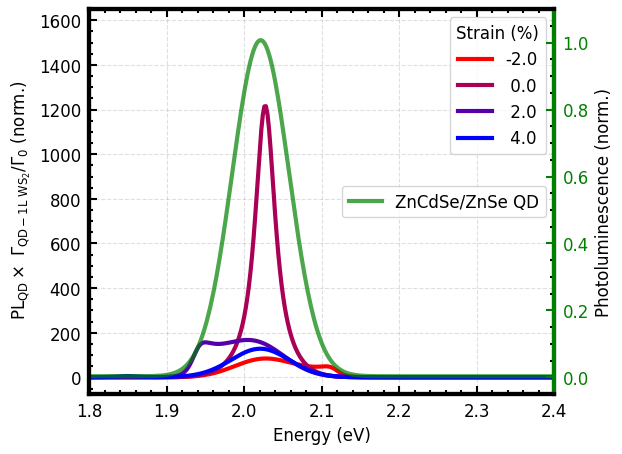

In [ ]:
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()

strain_range = np.arange(-2, 4.5, 2); blue_red_color_list = []; blue_red_color_list = colors_BR(len(strain_range))

for strain in strain_range:
  QD_2D_NRET_dipole_norm_x_QD_PL = calculate_QD_2D_NRET_dipole_norm(oscillator_function_array, strain, energy_array = energy_array) *  QD_gaussian_PL
  ax1.plot(energy_array, QD_2D_NRET_dipole_norm_x_QD_PL, color = blue_red_color_list[ np.where(strain_range == strain)[0][0] ], label='% .1f' %strain)
  data_to_export_pd["WS2 to QD, Normalized NRET rate times QD PL, (norm.), Strain = % .1f%%" %strain] = QD_2D_NRET_dipole_norm_x_QD_PL

ax2.plot(energy_array, QD_gaussian_PL, "green", alpha=0.7, label= QD_name + ' QD')

# plt.title("Strain dependence of normalized NRET rate $\Gamma/\Gamma_0}$ between \n CdSe/ZnS QD (590 nm) and monolayer WS2\n")

ax1.set_xlabel('Energy (eV)'); ax1.set_ylabel(" $\mathrm{PL_{QD}} \\times$ " + QD_1L_WS2_NRET_dipole_norm_text + " (norm.)"); ax2.set_ylabel('Photoluminescence (norm.)')

ax2.spines['right'].set_color('g'); ax2.grid(visible = False); ax2.tick_params(axis='y', colors='g')

plt.xlim(1.8, 2.4);  ax2.set_ylim([-0.05, 1.1]); ax1.set_ylim([-75, 1650])

ax1.legend(title = "Strain (%)"); ax2.legend(loc="center right")
plt.savefig(output_folder_address + "/Strain_dependent_NRET_normed_with_QD_WS2.png")
plt.show()
plt.close()


##Total NRET$\times$QD PL

In [ ]:
energy_range = np.linspace(1.5, 3.2, 100)

qd_strain_range = np.arange(-2, 8, .1)

QD_2D_NRET_dipole_norm_total_list = []

for strain in qd_strain_range:

  QD_2D_NRET_dipole_norm_total_list.append(calculate_QD_2D_NRET_dipole_norm_total( strain, energy_range, QD_PL_gauss_fit_params, oscillator_function_array = oscillator_function_array, t_2D= t_2D))

In [ ]:
QD_2D_NRET_dipole_norm_total_pd = pd.DataFrame( {"Strain, (%)" : qd_strain_range, "WS2 to QD, Total NRET rate": QD_2D_NRET_dipole_norm_total_list})

QD_2D_NRET_dipole_norm_total_pd

Strain, (%)  WS2 to QD, Total NRET rate
0          -2.0                  110.564024
1          -1.9                  117.650526
2          -1.8                  126.106859
3          -1.7                  136.118127
4          -1.6                  147.862899
..          ...                         ...
95          7.5                  203.010422
96          7.6                  207.407523
97          7.7                  212.015356
98          7.8                  216.840262
99          7.9                  221.888158

[100 rows x 2 columns]

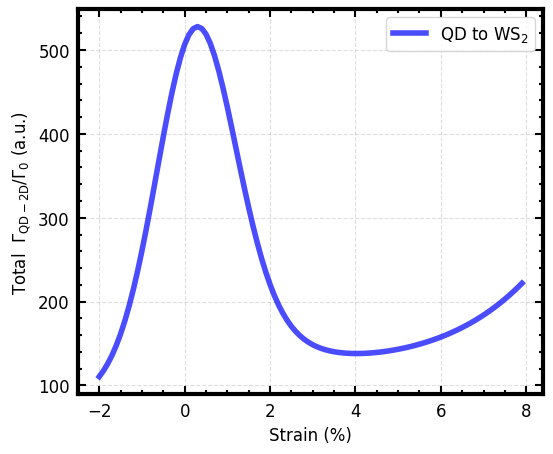

In [ ]:
plt.plot(qd_strain_range, QD_2D_NRET_dipole_norm_total_list, "-", label = "QD to " + WS2_text, color = "b", lw = 4,  alpha = 0.7)


#plt.title("Strain dependence of normalized NRET rate $\Gamma/\Gamma_0}$ between \n CdSe/ZnS QD (590 nm) and monolayer WS2\n")
plt.xlabel('Strain (%)'); plt.ylabel("Total  " + QD_2D_NRET_dipole_norm_text + " (norm.)")
plt.legend(title = "", loc="upper right");
#plt.xlim(-1,4); #plt.ylim(0,50)
#plt.title('\n Strain Dependence of Normalized NRET rate $\Gamma/\Gamma_0$ between\n %s QD and 1L $WS_2$ as a function of strain\n' %QD_name)
plt.savefig(output_folder_address + "/total_NRET_as_function_of_strain_1L_WS2.png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
energy_range = np.linspace(1.5, 3.2, 100)

qd_strain_range = np.arange(-2, 4, .1)

QD_2D_NRET_graphene_dipole_norm_total_list = []

for strain in qd_strain_range:

  QD_2D_NRET_graphene_dipole_norm_total_list.append(calculate_QD_2D_NRET_dipole_norm_total(strain, energy_range, QD_PL_gauss_fit_params, oscillator_function_array = epsilon_from_nk(n_Graphene, k_Graphene), eps_out = eps_outplane_Graphene, peak = 0, t_2D = t_2D_Graphene ))

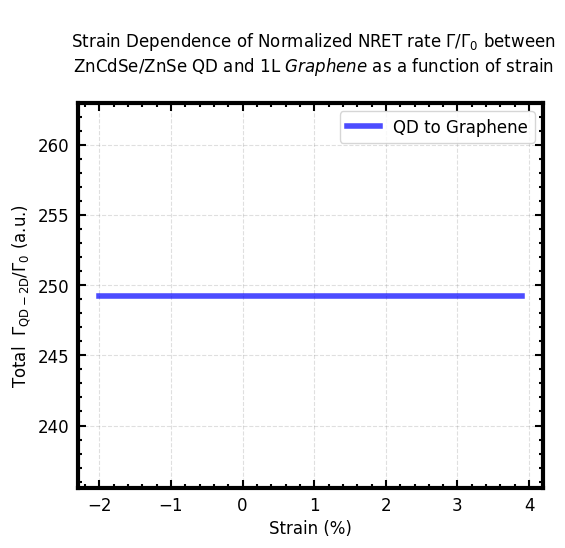

In [ ]:
plt.plot(qd_strain_range, QD_2D_NRET_graphene_dipole_norm_total_list, "-", label = 'QD to Graphene', color = "b", lw = 4,  alpha = 0.7)

#plt.title("Strain dependence of normalized NRET rate $\Gamma/\Gamma_0}$ between \n CdSe/ZnS QD (590 nm) and monolayer WS2\n")
plt.xlabel('Strain (%)'); plt.ylabel("Total  " + QD_2D_NRET_dipole_norm_text + " (norm.)")
plt.legend(title = "", loc="upper right");
#plt.xlim(-1,4); #plt.ylim(0,50)
plt.title('\n Strain Dependence of Normalized NRET rate $\Gamma/\Gamma_0$ between\n %s QD and 1L $Graphene$ as a function of strain\n' %QD_name)
plt.savefig(output_folder_address + "/total_NRET_as_function_of_strain_graphene.png", bbox_inches='tight')
plt.show()
plt.close()

##End Graphs

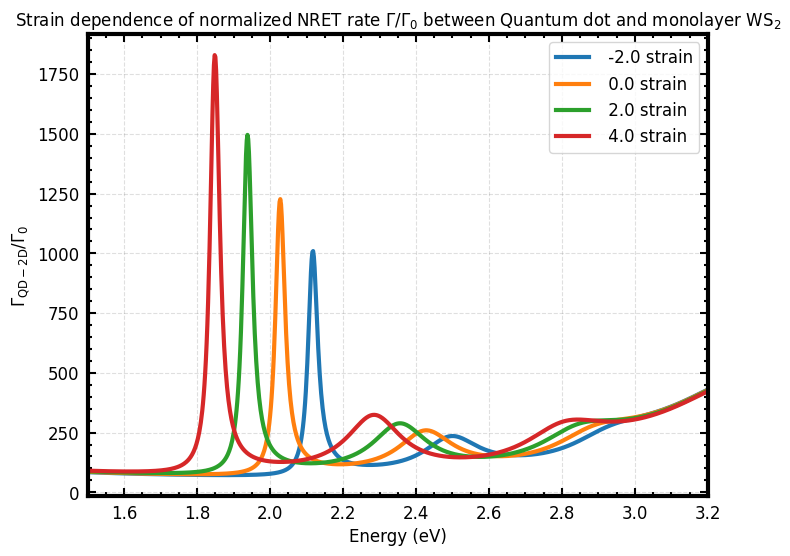

In [ ]:
figure(figsize=(8, 6))

for strain in strain_range:
  plt.plot(energy_array, calculate_QD_2D_NRET_dipole_norm(oscillator_function_array, strain = strain, energy_array = energy_array), label=' %s strain' % strain)

plt.legend(title = ""); plt.xlim(1.5, 3.2); #plt.ylim(1900, 2020)

plt.xlabel("Energy (eV)"); plt.ylabel(QD_2D_NRET_dipole_norm_text); plt.title("Strain dependence of normalized NRET rate $\Gamma/\Gamma_0$ between Quantum dot and monolayer " + WS2_text)
plt.savefig(output_folder_address + "/end_graph_of_strain_dependent_vacuum_NRET_QD_and_WS2.png")
plt.show()
plt.close()


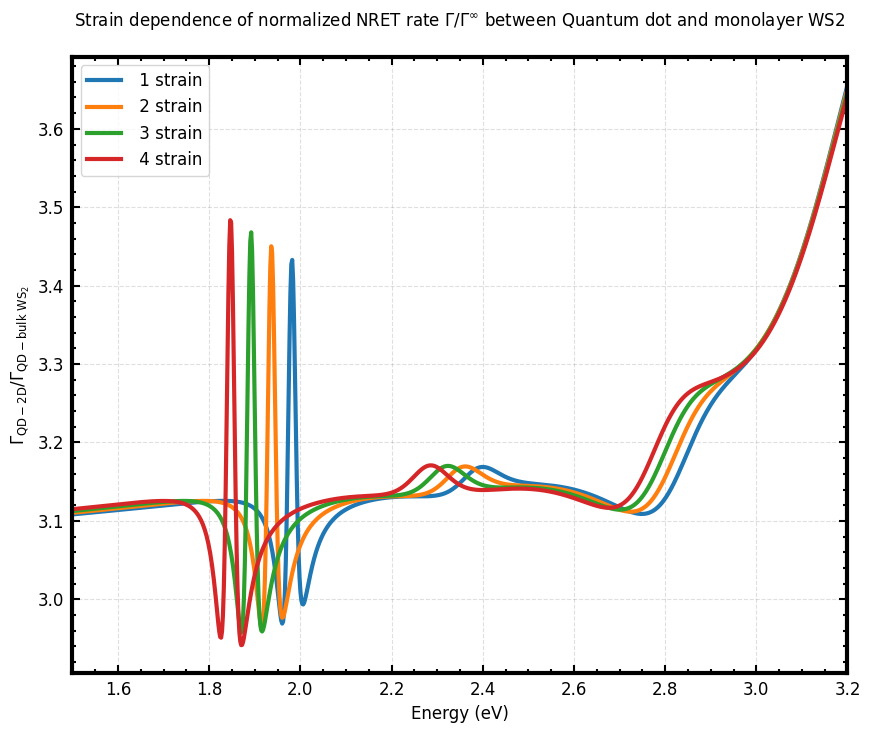

In [ ]:
figure(figsize=(10, 8))
for i in range (1,5):
  plt.plot(energy_array, QD_2D_NRET_bulk_norm(oscillator_function_array, i, energy_array), label=' %s strain' %i)

plt.legend(); plt.xlim(1.5, 3.2);#plt.ylim(1900, 2020)
plt.xlabel("Energy (eV)"); plt.ylabel(QD_2D_NRET_bulk_norm_text); plt.title("Strain dependence of normalized NRET rate $\Gamma/\Gamma^{\infty}$ between Quantum dot and monolayer WS2\n")
plt.savefig(output_folder_address + "/end_graph_of_strain_dependent_bulk_NRET_QD_and_WS2.png")
plt.show()
plt.close()

#**NRET between Monolayer Graphene and QD**



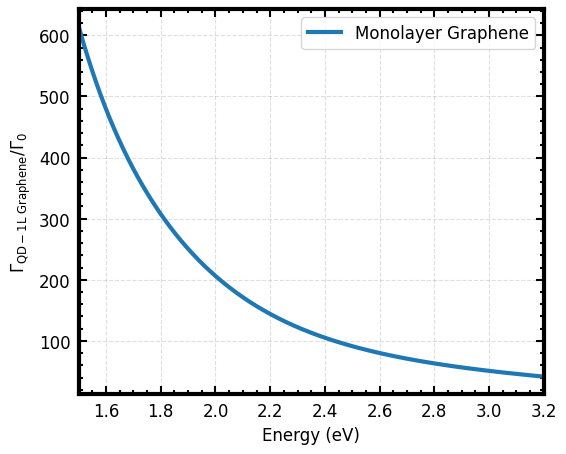

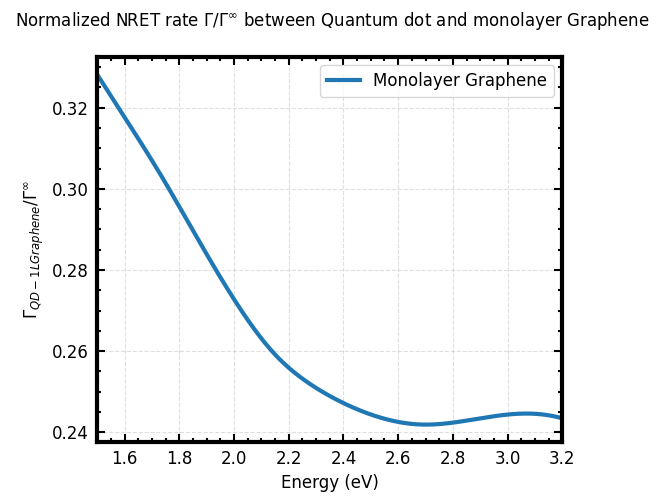

In [ ]:
plt.plot(drive_energy_array, calculate_QD_2D_NRET_dipole_norm(epsilon_from_nk(n_Graphene, k_Graphene), energy_array=drive_energy_array, eps_out=eps_outplane_Graphene, peak=0, t_2D=t_2D_Graphene), label = "Monolayer Graphene")

plt.legend(); plt.xlim(1.5, 3.2);#plt.ylim(1900, 2020)
plt.xlabel("Energy (eV)"); plt.ylabel(QD_1L_Graphene_NRET_dipole_norm_text); #plt.title(" Normalized NRET rate $\Gamma/\Gamma_0}$ between Quantum dot and monolayer Graphene\n")
plt.savefig(output_folder_address + "/end_graph_of_vacuum_NRET_QD_and_graphene.png")
plt.show()
plt.close()


plt.plot(drive_energy_array,QD_2D_NRET_bulk_norm(epsilon_from_nk(n_Graphene, k_Graphene), energy_array=drive_energy_array, eps_out=eps_outplane_Graphene, peak=0, t_2D=t_2D_Graphene) , label = "Monolayer Graphene")

plt.legend(); plt.xlim(1.5, 3.2);#plt.ylim(1900, 2020)
plt.xlabel("Energy (eV)"); plt.ylabel("$\Gamma_{QD-1L Graphene}/\Gamma^{\infty}$"); plt.title(" Normalized NRET rate $\Gamma/\Gamma^{\infty}$ between Quantum dot and monolayer Graphene\n")
plt.savefig(output_folder_address + "/end_graph_of_bulk_NRET_QD_and_graphene.png")
plt.show()
plt.close()


##Graphene and WS$_2$

In [ ]:
%%script false --no-raise-error
figure(figsize=(8, 6))

for strain in strain_range:
  plt.plot(drive_energy_array, calculate_QD_2D_NRET_dipole_norm(oscillator_function_array, strain = strain, energy_array = drive_energy_array), label=' %s strain' % strain)

plt.plot(drive_energy_array,calculate_QD_2D_NRET_dipole_norm(epsilon_from_nk(n_Graphene, k_Graphene), energy_array=drive_energy_array, eps_out=eps_outplane_Graphene, peak=0, t_2D=t_2D_Graphene), label="0 strain \n Monolayer Graphene")

plt.legend(title = ""); plt.xlim(1.5, 3.2); #plt.ylim(1900, 2020)

plt.xlabel("Energy (eV)"); plt.ylabel(QD_2D_NRET_dipole_norm_text); plt.title("Strain dependence of normalized NRET rate $\Gamma/\Gamma_0$ between Quantum dot and monolayer " + WS2_text +"\n with unstrained monolayer Graphene to compare\n")
plt.savefig(output_folder_address + "/end_graph_of_strain_dependent_vacuum_NRET_QD_and_WS2_with_unstrained_graphene.png")
plt.show()
plt.close()


In [ ]:
%%script false --no-raise-error
figure(figsize=(8, 6))

for strain in strain_range:
  plt.plot(energy_array, calculate_QD_2D_NRET_dipole_norm(oscillator_function_array, strain = strain, energy_array = energy_array), label=' %s strain' % strain)

plt.plot(drive_energy_array,calculate_QD_2D_NRET_dipole_norm(epsilon_from_nk(n_Graphene, k_Graphene), energy_array=drive_energy_array, eps_out=eps_outplane_Graphene, peak=0, t_2D=t_2D_Graphene), label="0 strain \n Monolayer Graphene")

plt.legend(title = ""); plt.xlim(1.5, 3.2); #plt.ylim(1900, 2020)

plt.xlabel("Energy (eV)"); plt.ylabel(QD_2D_NRET_dipole_norm_text); plt.title("Strain dependence of normalized NRET rate $\Gamma/\Gamma_0$ between Quantum dot and monolayer " +WS2_text+ "\nwith unstrained monolayer Graphene to compare\n")
plt.show()

In [ ]:
%%script false --no-raise-error
figure(figsize=(10, 8))
for i in range (1,5):
  plt.plot(energy_array, QD_2D_NRET_bulk_norm(oscillator_function_array, i, energy_array), label=' %s strain' %i)

plt.plot(drive_energy_array,QD_2D_NRET_bulk_norm(epsilon_from_nk(n_Graphene, k_Graphene), energy_array=drive_energy_array, eps_out=eps_outplane_Graphene, peak=0, t_2D=t_2D_Graphene), label="0 strain \n Monolayer Graphene")
plt.legend(); plt.xlim(1.5, 3.2);#plt.ylim(1900, 2020)
plt.xlabel("Energy (eV)"); plt.ylabel(QD_2D_NRET_bulk_norm_text); plt.title("Strain dependence of normalized NRET rate $\Gamma/\Gamma^{\infty}$ between Quantum dot and monolayer " + WS2_text + "\n with unstrained monolayer Graphene to compare\n")
plt.savefig(output_folder_address + "/end_graph_of_strain_dependent_bulk_NRET_QD_and_WS2_with_graphene.png")
plt.show()
plt.close()


#**Layer dependent NRET rate of WS$_2$ with OD**

In [ ]:
strain = 0

Qd_0D_2D_interaction_layer_list = []; Qd_0D_2D_interaction_int_layer_list = []

layer_range = np.arange(0, 11, .1)

layer_range_int = np.arange (min(layer_range), max(layer_range)) # integer numbers of layers

for layer_number in layer_range:

  Qd_0D_2D_interaction_layer_list.append(QD_2D_NRET_bulk_norm_total(oscillator_function_array, strain = strain, energy_array = energy_range, t_2D = layer_number * t_1L_WS2 ))


for layer_number in layer_range_int: # pick the calculations for integer numbers of layers

  Qd_0D_2D_interaction_int_layer_list.append( Qd_0D_2D_interaction_layer_list[ np.where(layer_number == layer_range)[0][0] ] )


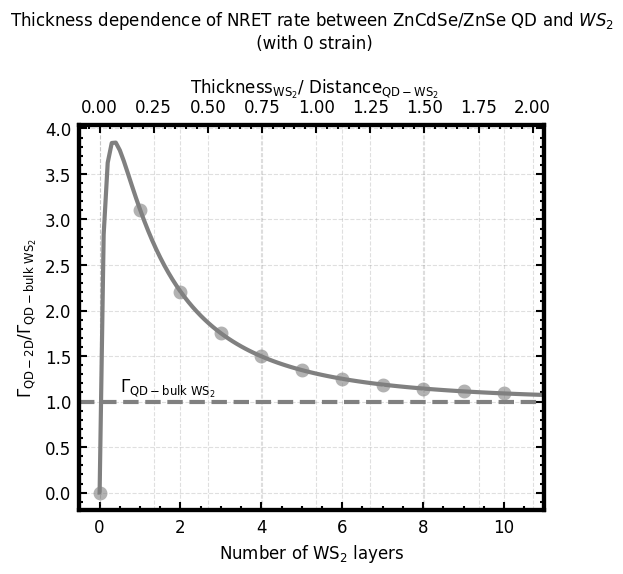

In [ ]:
fig = plt.figure(); ax1 = fig.add_subplot(111)

ax1.plot(layer_range, Qd_0D_2D_interaction_layer_list, "grey")

plt.plot(layer_range_int, Qd_0D_2D_interaction_int_layer_list, marker='.', color = 'grey', linestyle='none', fillstyle='none', markersize = 12, markeredgewidth = 4, alpha = 0.6 ) #, "grey", marker = 'o')

ax1.set_xlabel("Number of WS$_2$ layers"); ax1.set_ylabel(QD_2D_NRET_bulk_norm_text)

plt.axhline(y=1, color='grey', linestyle='--')

plt.text(0.5, 1.1, QD_bulk_2D_NRET_text, size = plt.rcParams['axes.labelsize'] )

x_lim = [-0.5, 11]
ax1.set_xlim(x_lim)
#ax1.set_ylim([0.0, 5])

ax2 = ax1.twiny()
ax2.set_xlabel(" Thickness$_{\mathrm{WS_2}}$/ Distance$_{\mathrm{QD-WS_2}}$")
ax2.set_xlim([ x_lim[0]*t_2D/d_0D_2D, x_lim[1]*t_2D/d_0D_2D])

plt.title("Thickness dependence of NRET rate between " + QD_name + " QD and $WS_2$\n (with %s strain)\n" %strain)

plt.savefig(output_folder_address + "/thickness_dependent_bulk_NRET_QD_WS2.png")
plt.show()
plt.close()


# Export Selected Data

In [ ]:
data_to_export_pd.columns.tolist(), QD_2D_NRET_dipole_norm_total_pd.columns.tolist()

([('Energy', '(eV)', '', ''),
  ('PL of Quantum Dot', '(a.u.)', '', ''),
  ('WS2', 'In-plane Dielectric Function', 'Real Part', 'Strain = -2.0%'),
  ('WS2', 'In-plane Dielectric Function', 'Real Part', 'Strain =  0.0%'),
  ('WS2', 'In-plane Dielectric Function', 'Real Part', 'Strain =  2.0%'),
  ('WS2', 'In-plane Dielectric Function', 'Real Part', 'Strain =  4.0%'),
  ('WS2', 'In-plane Dielectric Function', 'Imaginary Part', 'Strain = -2.0%'),
  ('WS2', 'In-plane Dielectric Function', 'Imaginary Part', 'Strain =  0.0%'),
  ('WS2', 'In-plane Dielectric Function', 'Imaginary Part', 'Strain =  2.0%'),
  ('WS2', 'In-plane Dielectric Function', 'Imaginary Part', 'Strain =  4.0%'),
  ('WS2 to QD', 'Normalized NRET rate', '', 'Strain = -2.0%'),
  ('WS2 to QD', 'Normalized NRET rate', '', 'Strain =  0.0%'),
  ('WS2 to QD', 'Normalized NRET rate', '', 'Strain =  2.0%'),
  ('WS2 to QD', 'Normalized NRET rate', '', 'Strain =  4.0%'),
  ('Graphene to QD', 'Normalized NRET rate', '', ''),
  ('WS2 t

In [ ]:
# split the headers using the key ", " and create multiple rows as new headers.
headers = data_to_export_pd.columns.tolist()
if any(", " in s for s in headers):
  headers_split = [header.split(", ") for header in headers ]

  header_0 =[]; header_1 =[]; header_2 =[]; header_3 =[]

  for header in headers_split:
    header_0.append(header[0])
    header_1.append(header[1])
    header_2.append(header[2])
    header_3.append(header[3])

  data_to_export_pd.columns= [header_0, header_1, header_2, header_3]


# split the headers using the key ", " and create multiple rows as new headers.
headers = QD_2D_NRET_dipole_norm_total_pd.columns.tolist()
if any(", " in s for s in headers):
  headers_split = [header.split(", ") for header in headers ]

  header_0 =[]; header_1 =[]; header_2 =[]; header_3 =[]

  for header in headers_split:
    header_0.append(header[0])
    header_1.append(header[1])
  QD_2D_NRET_dipole_norm_total_pd.columns= [header_0, header_1]

data_to_export_pd

Energy PL of Quantum Dot                          WS2                 \
      (eV)            (a.u.) In-plane Dielectric Function                  
                                                Real Part                  
                                           Strain = -2.0% Strain =  0.0%   
0    1.500          0.003321                    16.499640      16.814824   
1    1.502          0.003321                    16.508174      16.824766   
2    1.504          0.003321                    16.516745      16.834755   
3    1.506          0.003321                    16.525352      16.844794   
4    1.508          0.003321                    16.533994      16.854882   
..     ...               ...                          ...            ...   
846  3.192          0.003321                    -3.216824      -2.780703   
847  3.194          0.003321                    -3.265820      -2.832817   
848  3.196          0.003321                    -3.313489      -2.883586   
849  3.198          0.003321                    -3.359837      -2.933016   
850  3.200          0.003321                    -3.404873      -2.981114   

                                                                 \
                                                                  
                                  Imaginary Part                  
    Strain =  2.0% Strain =  4.0% Strain = -2.0% Strain =  0.0%   
0        17.221307      17.782317       0.670620       0.698284   
1        17.233517      17.798678       0.672782       0.700633   
2        17.245802      17.815173       0.674954       0.702994   
3        17.258162      17.831805       0.677135       0.705365   
4        17.270598      17.848574       0.679325       0.707748   
..             ...            ...            ...            ...   
846      -2.405958      -2.083165      17.613231      17.270850   
847      -2.460768      -2.140249      17.503647      17.166307   
848      -2.514212      -2.195949      17.394013      17.061620   
849      -2.566296      -2.250269      17.284352      16.956815   
850      -2.617027      -2.303216      17.174690      16.851918   

                                             WS2 to QD                 \
                                  Normalized NRET rate                  
                                                                        
    Strain =  2.0% Strain =  4.0%       Strain = -2.0% Strain =  0.0%   
0         0.735958       0.792213            84.426556      85.830830   
1         0.738614       0.795466            84.305660      85.711528   
2         0.741284       0.798743            84.185443      85.592940   
3         0.743970       0.802047            84.065904      85.475065   
4         0.746672       0.805377            83.947039      85.357899   
..             ...            ...                  ...            ...   
846      17.014266      16.817583           423.879440     422.110380   
847      16.913214      16.719013           425.405110     423.617666   
848      16.811958      16.620197           426.931363     425.124875   
849      16.710525      16.521166           428.457858     426.631656   
850      16.608942      16.421945           429.984249     428.137656   

                                        Graphene to QD  \
                                  Normalized NRET rate   
                                                         
    Strain =  2.0% Strain =  4.0%                        
0        87.753754      90.656553           614.264166   
1        87.639464      90.557919           611.083553   
2        87.525981      90.460421           607.925689   
3        87.413304      90.364065           604.789323   
4        87.301434      90.268861           601.674511   
..             ...            ...                  ...   
846     419.619414     416.830255            41.863689   
847     421.119578     418.328377            41.778629   
848     422.618900     419.824906            41.693781   
849    

In [ ]:
headers

[('Strain', '(%)'), ('WS2 to QD', 'Total NRET rate')]

In [ ]:
QD_2D_NRET_dipole_norm_total_pd

Strain       WS2 to QD
      (%) Total NRET rate
0    -2.0      110.564024
1    -1.9      117.650526
2    -1.8      126.106859
3    -1.7      136.118127
4    -1.6      147.862899
..    ...             ...
95    7.5      203.010422
96    7.6      207.407523
97    7.7      212.015356
98    7.8      216.840262
99    7.9      221.888158

[100 rows x 2 columns]

In [ ]:
export_pd(data_to_export_pd, file_name = "Refractive Index, PL, NRET data")
export_pd(QD_2D_NRET_dipole_norm_total_pd, "Total NRET rate vs Strain")

'/content/drive/MyDrive/Optics_of_2D_Materials/Python_Coding/NRET_from_QD_2D/Outputs/Total NRET rate vs Strain.csv'